----------------
# <font color = 'red'> Credit Exploratory Data Analysis - Case Study </font>

### BY -
- `Nitanshu Joshi`
- `Anshika Dua`

----------------

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
 
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
- All other cases: All other cases when the payment is paid on time.



When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- `Approved`: 	The Company has approved loan Application
- `Cancelled`: 	The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
- `Refused`: 	The company had rejected the loan (because the client does not meet their requirements etc.).
- `Unused offer`:  	Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (too risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).


### Data Understanding
This dataset has 3 files as explained below: 
 
- `application_data.csv`: Contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
- `previous_application.csv`: Contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
- `columns_description.csv`: This is a data dictionary which describes the meaning of the variables.


### Results Expected by Learners
- Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.
- Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)
 

`**Hint**: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.`
 
- Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.
- Identify if there is data imbalance in the data. Find the ratio of data imbalance.

`**Hint**: How will you analyses the data in case of data imbalance? You can plot more than one type of plot to analyses the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset (clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.`
 
`**Hint**: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.`


- Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.
- Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  
- Include visualizations and summarize the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 


In [2]:
# Importing Libraries
# -------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Setting Warnings
# -----------------
# If there are any warning due to version mismatch, it will be ignored
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Setting other formatting options
# ---------------------------------
# To display all the columns
pd.set_option('display.max_columns', 150)

In [7]:
# importing the dataset
# ---------------------
df1 = pd.read_csv('application_data.csv')


# Having an overview of the Dataset
# ---------------------------------
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Checking the shape of the dataset
# ---------------------------------
df1.shape

(307511, 122)

In [7]:
# Application Data has around 300,000 rows and 122 columns

In [8]:
df1.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

<br><br>
### Before we move forward with Data Cleaning, we will rule out the unnecessary columns/variables from the Dataset
<br>

#### Removing unnecessary columns

In [9]:
# After looking and exploring the columns we see that some columns which are unnessary for analysis are - 
# Since for our EDA, flag columns will not be required, we can ignore them.
# Other columns we can ignore are those which contains Normalized values.

# So here we generate a list of unnecessary columns:
# -------------------------------------------------
unnecessary_columns = ['FLAG_MOBIL', 
                       'FLAG_EMP_PHONE', 
                       'FLAG_WORK_PHONE', 
                       'FLAG_CONT_MOBILE', 
                       'FLAG_PHONE',
                       'FLAG_EMAIL', 
                       'HOUR_APPR_PROCESS_START', 
                       'BASEMENTAREA_AVG', 
                       'YEARS_BEGINEXPLUATATION_AVG',
                       'YEARS_BUILD_AVG', 
                       'COMMONAREA_AVG', 
                       'ELEVATORS_AVG',
                       'ENTRANCES_AVG',
                       'FLOORSMAX_AVG',
                       'FLOORSMIN_AVG',
                       'LANDAREA_AVG',
                       'LIVINGAPARTMENTS_AVG',
                       'LIVINGAREA_AVG',
                       'NONLIVINGAPARTMENTS_AVG',
                       'NONLIVINGAREA_AVG',
                       'APARTMENTS_MODE',
                       'BASEMENTAREA_MODE',
                       'YEARS_BEGINEXPLUATATION_MODE',
                       'YEARS_BUILD_MODE',
                       'COMMONAREA_MODE',
                       'ELEVATORS_MODE',
                       'ENTRANCES_MODE',
                       'FLOORSMAX_MODE',
                       'FLOORSMIN_MODE',
                       'LANDAREA_MODE',
                       'LIVINGAPARTMENTS_MODE',
                       'LIVINGAREA_MODE',
                       'NONLIVINGAPARTMENTS_MODE',
                       'NONLIVINGAREA_MODE',
                       'APARTMENTS_MEDI',
                       'BASEMENTAREA_MEDI',
                       'YEARS_BEGINEXPLUATATION_MEDI',
                       'YEARS_BUILD_MEDI',
                       'COMMONAREA_MEDI',
                       'ELEVATORS_MEDI',
                       'ENTRANCES_MEDI',
                       'FLOORSMAX_MEDI',
                       'FLOORSMIN_MEDI',
                       'LANDAREA_MEDI',
                       'LIVINGAPARTMENTS_MEDI',
                       'LIVINGAREA_MEDI',
                       'NONLIVINGAPARTMENTS_MEDI',
                       'NONLIVINGAREA_MEDI',
                       'FONDKAPREMONT_MODE',
                       'HOUSETYPE_MODE',
                       'TOTALAREA_MODE',
                       'WALLSMATERIAL_MODE',
                       'EMERGENCYSTATE_MODE',
                       'OBS_30_CNT_SOCIAL_CIRCLE',
                       'DEF_30_CNT_SOCIAL_CIRCLE',
                       'OBS_60_CNT_SOCIAL_CIRCLE',
                       'DEF_60_CNT_SOCIAL_CIRCLE',
                       'DAYS_LAST_PHONE_CHANGE',
                       'EXT_SOURCE_1',
                       'EXT_SOURCE_2',
                       'EXT_SOURCE_3',
                       'FLAG_DOCUMENT_2', 
                       'FLAG_DOCUMENT_3',
                       'FLAG_DOCUMENT_4', 
                       'FLAG_DOCUMENT_5', 
                       'FLAG_DOCUMENT_6',
                       'FLAG_DOCUMENT_7', 
                       'FLAG_DOCUMENT_8', 
                       'FLAG_DOCUMENT_9',
                       'FLAG_DOCUMENT_10', 
                       'FLAG_DOCUMENT_11', 
                       'FLAG_DOCUMENT_12',
                       'FLAG_DOCUMENT_13', 
                       'FLAG_DOCUMENT_14', 
                       'FLAG_DOCUMENT_15',
                       'FLAG_DOCUMENT_16', 
                       'FLAG_DOCUMENT_17',
                       'FLAG_DOCUMENT_18', 
                       'FLAG_DOCUMENT_19', 
                       'FLAG_DOCUMENT_20', 
                       'FLAG_DOCUMENT_21']

In [10]:
# Dropping the unnecessary columns
df1.drop(labels = unnecessary_columns, axis=1, inplace=True)

<br><br><br>

## 1) - Data Cleaning

<br><br>

### 1.1) - Finding and cleaning the NULL values


In [11]:
# Let's find the count of columns which contains at least 1 NULL value:
# --------------------------------------------------------------------
df1.isnull().any().sum()

13

In [12]:
# We see that there are 13 columns which contains some NULL values in the form of NaN.
# Let's explore these further

In [13]:
# Function to count the NULL values and Give its details
# ------------------------------------------------------
def show_null_count(df, all_val):
    """
    Function to count the NULL values and Give its details
        df : dataframe for which NULL values have to be displayed
        all_val: takes a boolean value to show whether to show NULL values for all columns or not
            - all_val = True : Show NULL value details of all columns
            - all_val = False : Show NULL value details for only those columns that have NULL values.
    """
    a = df.isnull().sum().round(2).tolist()
    col = df.columns.values.tolist()

    
    if all_val == True:
        for i in range(0, len(col)):
            print("--------------------------------------------------------------------------------------")
            print("{} : \t\t\t\t\t {}".format(col[i], a[i]))
    
    else:
        for i in range(0, len(col)):
            if a[i] > 0.0000000000000000000000000000000000:
                print("--------------------------------------------------------------------------------------")
                print("{} : \t\t\t\t\t {}".format(col[i], a[i]))
    
# -----------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------
# Function to Show details of the Percentage of NULL values
# ---------------------------------------------------------
def show_null_percentage(df, all_val):
    """
    Function to Show details of the Percentage of NULL values
        df : dataframe for which NULL values have to be displayed
        all_val: takes a boolean value to show whether to show NULL values for all columns or not
            - all_val = True : Show NULL value details of all columns
            - all_val = False : Show NULL value details for only those columns that have NULL values.
    """
    a = df.isnull().mean().round(2).tolist()
    col = df.columns.values.tolist()
    
    if all_val == True:
        for i in range(0, len(col)):
            print("--------------------------------------------------------------------------------------")
            print("{} : \t\t\t\t\t {}".format(col[i], a[i]*100))
    
    else:
        for i in range(0, len(col)):
            if a[i] > 0.000000000000000000000000000000:
                print("--------------------------------------------------------------------------------------")
                print("{} : \t\t\t\t\t {}".format(col[i], a[i]*100))
                
# -----------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------                

## Function to return a Data Frame with only those columns that have more than 0 NULL values
# -------------------------------------------------------------------------------------------
def col_with_null_val(df):
    """
    Returns a Data Frame with only those columns that have more than 0 NULL values
        df: Data Frame
    """
    
    col_null_value_details = df.isnull().sum().tolist()
    column_name_list = df.columns.values.tolist()
    result = []

    for i in range(0,len(column_name_list)):
        if col_null_value_details[i] > 0:
            result.append(column_name_list[i])
    
    return result                

In [14]:
# Let's view the NULL values associated with each column
# ------------------------------------------------------
show_null_count(df1, False)

--------------------------------------------------------------------------------------
AMT_ANNUITY : 					 12
--------------------------------------------------------------------------------------
AMT_GOODS_PRICE : 					 278
--------------------------------------------------------------------------------------
NAME_TYPE_SUITE : 					 1292
--------------------------------------------------------------------------------------
OWN_CAR_AGE : 					 202929
--------------------------------------------------------------------------------------
OCCUPATION_TYPE : 					 96391
--------------------------------------------------------------------------------------
CNT_FAM_MEMBERS : 					 2
--------------------------------------------------------------------------------------
APARTMENTS_AVG : 					 156061
--------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR : 					 41519
----------------------------------------------------------------------

In [15]:
# Let's view the percentage of NULL values associated with each column
# --------------------------------------------------------------------
show_null_percentage(df1,False)

--------------------------------------------------------------------------------------
OWN_CAR_AGE : 					 66.0
--------------------------------------------------------------------------------------
OCCUPATION_TYPE : 					 31.0
--------------------------------------------------------------------------------------
APARTMENTS_AVG : 					 51.0
--------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR : 					 14.000000000000002
--------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY : 					 14.000000000000002
--------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK : 					 14.000000000000002
--------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON : 					 14.000000000000002
--------------------------------------------------------------------------------------
AMT_REQ_

In [16]:
# From the above output, we can see that, quite a few columns have a high percentage of NULL values
# Since a high number of NULL values exist, it could impact the output findings severely.
# Since there are a lot of rows in the dataset (around 300,000),


#### ---- Deleting columns with more than 13% NULL values

It will be better to remove rows with more than 13% missing values/NULL values, since they make up upto 39,000 rows.


In [17]:
# Finding the number of columns with NULL values of more than 13%:
# ---------------------------------------------------------------
temp1 = df1.isnull().mean().round(3).values

c = 0;     c1=0;
for i in temp1:
    c1 += 1
    if i > 0.13:
        c += 1

print("{} out of {} columns have more than 13% NULL values".format(c,c1))

9 out of 41 columns have more than 13% NULL values


In [18]:
# We see that there are 9 columns out of 41 with more than 13% NULL values.

In [19]:
null_col_13_percent = df1.isnull().sum()
null_col_13_percent = null_col_13_percent[null_col_13_percent > (0.13 * len(df1))]

print("We see that the number of NULL values in each of these columns are as follows: \n")
print(null_col_13_percent)

We see that the number of NULL values in each of these columns are as follows: 

OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
APARTMENTS_AVG                156061
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
dtype: int64


In [20]:
# So now we can clearly see that the NULL values in each of these columns is huge,
# and having them in dataset will greatly impact the results.
# We can now remove the columns with more than 25% NULL values

In [21]:
# Dropping the Columns more than 13% NULL values
# ----------------------------------------------
removing_null_13_per = list(null_col_13_percent.index)
df1.drop(labels = removing_null_13_per, axis=1, inplace = True)

In [22]:
# Verifying whether the columns have been removed or not
# ------------------------------------------------------
null_col_13_percent = df1.isnull().sum()
null_col_13_percent = null_col_13_percent[null_col_13_percent > (0.13 * len(df1))]

print("So we once again see that the total number of columns with NULL values more than 13% is : ",len(null_col_13_percent))

So we once again see that the total number of columns with NULL values more than 13% is :  0


In [23]:
# We verified, that the changes have been made.
# We see that columns with more than 25% NULL values have been removed.

In [24]:
# Now let us explore other columns which still have some null values
# ------------------------------------------------------------------

show_null_count(df1, False)

--------------------------------------------------------------------------------------
AMT_ANNUITY : 					 12
--------------------------------------------------------------------------------------
AMT_GOODS_PRICE : 					 278
--------------------------------------------------------------------------------------
NAME_TYPE_SUITE : 					 1292
--------------------------------------------------------------------------------------
CNT_FAM_MEMBERS : 					 2


In [25]:
# There are still 4 columns with NULL values in it.

#### ---- Handling NULL values in AMT_ANNUITY column:

In [26]:
# *********************************************************************************
# ++++++++ An annuity loan is a situation in which an annuity holder will +++++++++
# ++++++++ borrow money against the value of his/her annuity contract.    +++++++++
# ++++++++ It can allow people to access funds without going through      +++++++++
# ++++++++ the process of cashing out their annuity, which                +++++++++
# ++++++++ may leave them exposed to taxes and penalties.                 +++++++++
# *********************************************************************************

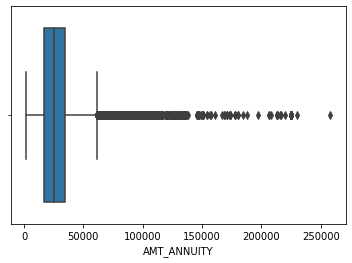

In [27]:
# There are 12 NULL values in this column. Since, the number is very less, 
# we can try to impute these missing values.

# Before deciding whether to impute it using mean or median, let's look at its Boxplot
sns.boxplot(df1['AMT_ANNUITY'])
plt.show()



In [28]:
# Since there are a lot of outliers present in the data, thus we should impute NULLs with the MEDIAN

In [29]:
annuity_median = df1['AMT_ANNUITY'].median()
df1.loc[df1['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=annuity_median

In [30]:
# Reviewing the NULL counts again:
# -------------------------------
show_null_count(df1, False)

--------------------------------------------------------------------------------------
AMT_GOODS_PRICE : 					 278
--------------------------------------------------------------------------------------
NAME_TYPE_SUITE : 					 1292
--------------------------------------------------------------------------------------
CNT_FAM_MEMBERS : 					 2


#### ---- Handling NULL values in AMT_GOODS_PRICE

In [31]:
# ***********************************************************************
# ++++++++ For consumer loans it is the price of the goods for  +++++++++
# ++++++++ which the loan is given                              +++++++++
# ***********************************************************************

In [32]:
# There are 278 NULL values in this column. 
# Since, the number is very less, we can try to impute these missing values.

In [33]:
df1.AMT_GOODS_PRICE.describe().round(3)

count     307233.000
mean      538396.207
std       369446.461
min        40500.000
25%       238500.000
50%       450000.000
75%       679500.000
max      4050000.000
Name: AMT_GOODS_PRICE, dtype: float64

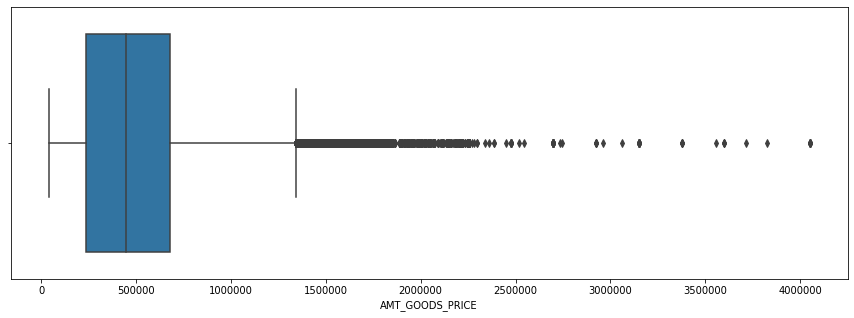

In [34]:
plt.figure(figsize = (15,5))
sns.boxplot(df1['AMT_GOODS_PRICE'])
plt.show()

In [35]:
# Since there are a lot of outliers present in the data, thus we should impute NULLs with the MEDIAN

In [36]:
goods_price_median = df1['AMT_GOODS_PRICE'].median()
df1.loc[df1['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = goods_price_median

In [37]:
# Reviewing the NULL counts again:
# -------------------------------
show_null_count(df1, False)

--------------------------------------------------------------------------------------
NAME_TYPE_SUITE : 					 1292
--------------------------------------------------------------------------------------
CNT_FAM_MEMBERS : 					 2


#### ---- Handling NULL values in NAME_TYPE_SUITE

In [38]:
# We observe that there are 1292 values missing in this column, 
# which is still less as compared to total number of rows.
# Hence here we can impute the NULL values.

# Since the column/variable is a categorical variable, 
# we can replace it by creating a new category - "NOT-known"

In [39]:
df1.loc[df1['NAME_TYPE_SUITE'].isnull(), 'NAME_TYPE_SUITE'] = "NOT-KNOWN"

In [40]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NOT-KNOWN            1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [41]:
# Reviewing the NULL counts again:
# -------------------------------
show_null_count(df1, False)

--------------------------------------------------------------------------------------
CNT_FAM_MEMBERS : 					 2


#### ---- Handling NULL values in CNT_FAM_MEMBERS

In [42]:
# We observe that there are only 2 values missing in this column, 
# which is exceptionally low as compared to total number of rows.
# Hence here we can impute the NULL values.

In [43]:
df1['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

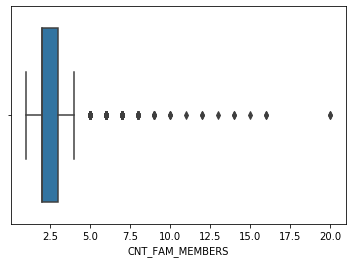

In [44]:
sns.boxplot(df1['CNT_FAM_MEMBERS'])
plt.show()

In [45]:
# Since a lot of outliers are present in the variable, 
# it will be wise to replace the Nulls with Median

fam_count_median = df1['CNT_FAM_MEMBERS'].median()
df1.loc[df1['CNT_FAM_MEMBERS'].isnull(), 'CNT_FAM_MEMBERS'] = fam_count_median

In [46]:
# We have dealt with all the NULL values in all the columns.
# We can verify it using - 

df1.isnull().any().sum()

0

In [47]:
# So it is verified that there are no NULL values in the Data Frame.

<br><br>
### 1.2) - Finding any other non-visible NULL values: 
<br>

In [48]:
# Looking at some variables

In [49]:
# Variable/Column - 'CODE_GENDER'
# -------------------------------

In [50]:
df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [51]:
# We see that there are 4 counts if 'XNA' values which are the NULL values here
# Since NULL values here are very less in number and the variable is categorical, 
# thus we can replace them by the mode of the variable.

gender_mode = df1['CODE_GENDER'].mode()[0]
print(gender_mode)

F


In [52]:
# Since the mode of the gender is 'F', we can replace the NULL values by 'F'.
df1.loc[df1['CODE_GENDER']=='XNA','CODE_GENDER']=gender_mode

In [53]:
df1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [54]:
# Variable/Column - 'ORG'

In [55]:
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [56]:
# We see that there are 55374 rows where 'XNA' value is present, which constitutes of around 18% of the dataset.
# These are a lot of values, so imputing any particular value is not possible.

# Also the column is an important one, 
# so we should not remove any value, and hence just rename the 'XNA' to 'NOT-KNOWN'

df1.loc[df1['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = 'NOT-KNOWN'
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
NOT-KNOWN                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [58]:
df1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,MONDAY,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,MONDAY,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,THURSDAY,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,2.0,2,2,WEDNESDAY,0,0,0,0,0,0,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,3.0,2,2,SUNDAY,0,0,0,0,0,0,Business Entity Type 3
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,2.0,3,3,MONDAY,0,0,0,0,1,1,Other
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,2.0,2,2,WEDNESDAY,0,0,0,0,0,0,NOT-KNOWN
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1.0,2,2,THURSDAY,0,0,0,0,0,0,Electricity


In [59]:
# We see that some columns have negative values like - 
# >> DAYS_BIRTH
# >> DAYS_EMPLOYED
# >> DAYS_REGISTRATION 
# >> DAYS_ID_PUBLISH

In [60]:
# When we describe these columns we see that:
df1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [61]:
# There are 3 columns which have only negative values, 
# so to use them better, we will have to make them positive
df1['DAYS_BIRTH'] = abs(df1['DAYS_BIRTH'])
df1['DAYS_REGISTRATION'] = abs(df1['DAYS_REGISTRATION'])
df1['DAYS_ID_PUBLISH'] = abs(df1['DAYS_ID_PUBLISH'])

In [62]:
df1[['DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,3648.0,2120
1,16765,1186.0,291
2,19046,4260.0,2531
3,19005,9833.0,2437
4,19932,4311.0,3458


In [63]:
# So we see that the change has been made.

In [64]:
df1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [65]:
# Looking at the target variable we see that 2 possible outcomes are there -
# > 1 : Client has defaulted/client with payment difficulties
# > 0 : They have not/ all other cases.  

In [66]:
# --------------------------------------------------------------------------------------------------------------

### DERIVED METRICS

In [67]:
# plt.style.available


#### 1) - Derived metric for AMT_INCOME_TOTAL column.
<br>


In [68]:
# Before going forward with further analysis, let's take a look at some numerical columns like Income, Credit_Amount, etc.
# ------------------------------------------------------------------------------------------------------------------------
print("Unique Incomes possible: ",len(df1['AMT_INCOME_TOTAL'].value_counts()))
print("\n\n Description of Income Data: ", df1['AMT_INCOME_TOTAL'].describe().round(1))

Unique Incomes possible:  2548


 Description of Income Data:  count       307511.0
mean        168797.9
std         237123.1
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [69]:
# Creating a Derived Metric for Income Column
# -------------------------------------------
# We see that there are 2548 unique income values possible for the column.
# We also see that outliers are also present in the columns.
# So it will be wise to create some bins for the income amount - 

bins = [0, 25000, 50000, 75000, 100000, 
        150000, 200000, 250000, 300000, 350000, 
        400000, 450000, 500000, 117000000]

descriptions = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', 
         '150K-200K', '200K-250K', '250K-300K', '300K-350K', '350K-400K', 
         '400K-450K', '450K-500K', '500K and above']

df1['AMT_INCOME_RANGE'] = pd.cut(df1['AMT_INCOME_TOTAL'], bins, labels = descriptions)
df1['AMT_INCOME_RANGE'].value_counts()

100K-150K         91591
150K-200K         64307
200K-250K         48137
75K-100K          39806
50K-75K           19375
250K-300K         17039
300K-350K          8874
350K-400K          5802
400K-450K          4924
25K-50K            4517
500K and above     2702
450K-500K           437
0-25K                 0
Name: AMT_INCOME_RANGE, dtype: int64

In [70]:
# --------------------------------------------------------------------------------------------------------------

#### 2) - Derived metric for the AMT_CREDIT column.

<br>

In [71]:
# Creating a Derived Metric for AMT_CREDIT
# ----------------------------------------

df1['AMT_CREDIT'].describe().round(2)

count     307511.00
mean      599026.00
std       402490.78
min        45000.00
25%       270000.00
50%       513531.00
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [72]:
bins = [40000, 100000, 200000, 300000 ,400000, 500000, 600000, 700000, 800000, 900000, 4050000]

descriptions = ['40K-100K' ,'100K-200K','200K-300K', '300K-400K',
               '400K-500K', '500K-600K','600K-700K', '700K-800K',
               '800K-900K', '900K & above']

df1['AMT_CREDIT_RANGE'] = pd.cut(df1['AMT_CREDIT'], bins, labels = descriptions)
df1['AMT_CREDIT_RANGE'].value_counts()

900K & above    58912
200K-300K       54813
500K-600K       34232
400K-500K       32038
100K-200K       30140
300K-400K       26338
600K-700K       24049
800K-900K       21792
700K-800K       19193
40K-100K         6004
Name: AMT_CREDIT_RANGE, dtype: int64

In [73]:
# --------------------------------------------------------------------------------------------------------------



#### 3) - Derived Metric for DAYS_BIRTH column

<br>

In [74]:
# Creating a Derived Metric for Age Column
# ----------------------------------------
df1['AGE'] = (df1['DAYS_BIRTH']/365).astype(int)

In [75]:
df1.AGE.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [76]:
# To use the age variable in a plot, it will be more efficient to create a range for ages.
# ---------------------------------------------------------------------------------------
bins = [20,25,30,35,40,45,50,55,60,65,70]
descriptions = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']

df1['AGE_RANGE'] = pd.cut(df1['AGE'], bins, labels = descriptions)
df1['AGE_RANGE'].value_counts()

35-40    43680
40-45    39997
30-35    39437
25-30    36488
50-55    35097
45-50    34404
55-60    32722
60-65    24359
20-25    16317
65-70     5009
Name: AGE_RANGE, dtype: int64

In [77]:
# --------------------------------------------------------------------------------------------------------------

<br><br>
## UNIVARIATE ANALYSIS
<br><br>

In [78]:
# Before doing univariate analyisis and plotting, it will be better to split dataframes in two - 
# 1st - for Target value = 0
# 2nd - for Target value = 1

df_target_0 = df1[df1['TARGET'] == 0]
df_target_1 = df1[df1['TARGET'] == 1]


### Outlier Analysis Comparison for clients having Target = 0 V/S clients having Target == 1

<br>

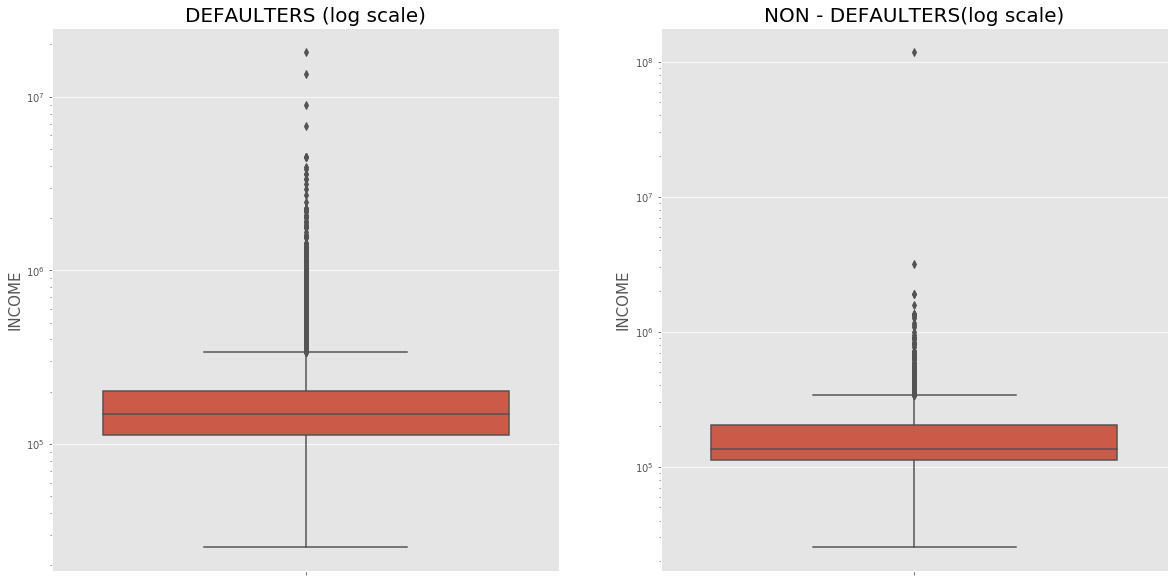

In [79]:
# For Income Variable:
# -------------------

plt.figure(figsize = (20,10))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.boxplot(df_target_0['AMT_INCOME_TOTAL'], orient = 'v')
plt.title('DEFAULTERS (log scale)', fontsize=20)
plt.ylabel('INCOME', fontsize=15)
plt.yscale('log')

plt.subplot(1,2,2)
sns.boxplot(df_target_1['AMT_INCOME_TOTAL'], orient = 'v')
plt.title('NON - DEFAULTERS(log scale)', fontsize=20)
plt.ylabel('INCOME', fontsize=15)
plt.yscale('log')

plt.show()

In [80]:
# Observations and Inferences
# ---------------------------
#
# We observe that the inter-quartile range of clients WHO HAVE DEFAULTED is slightly higher than 
#  clients WHO HAVE NOT DEFAULTED.
#
# We also observe that number of outliers for DEFAULTER clients is more and high as compared to 
#  clients who are NOT Defaulters. 

In [81]:
# -------------------------------------------------------------------------------------------------------------------

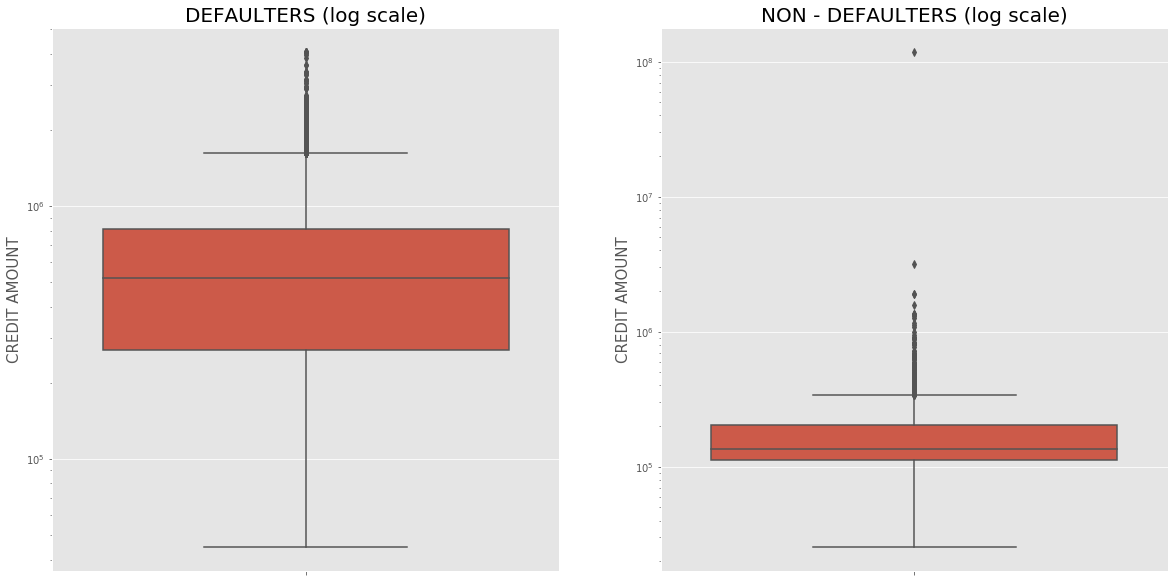

In [83]:
# For Credit Variable:
# -------------------

plt.figure(figsize = (20,10))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.boxplot(df_target_0['AMT_CREDIT'], orient = 'v')
plt.title('DEFAULTERS (log scale)', fontsize=20)
plt.ylabel('CREDIT AMOUNT', fontsize=15)
plt.yscale('log')

plt.subplot(1,2,2)
sns.boxplot(df_target_1['AMT_INCOME_TOTAL'], orient = 'v')
plt.title('NON - DEFAULTERS (log scale)', fontsize=20)
plt.ylabel('CREDIT AMOUNT', fontsize=15)
plt.yscale('log')

plt.show()

In [84]:
# Observations and Inferences
# ---------------------------
# - We see that the interquartile range for the credit amount data is higher for clients WHO ARE defaulters.
#
# - We see that outliers are present in both cases, but for Targer = 0, outliers are more on the higher side.
#
# --> We can infer that clients who are seeking a higher credit loan amount tend to deefault more as compared to 
#     clients who take a lower credit loan amount.

In [85]:
# -------------------------------------------------------------------------------------------------------------------

In [86]:
# -------------------------------------------------------------------------------------------------------------------

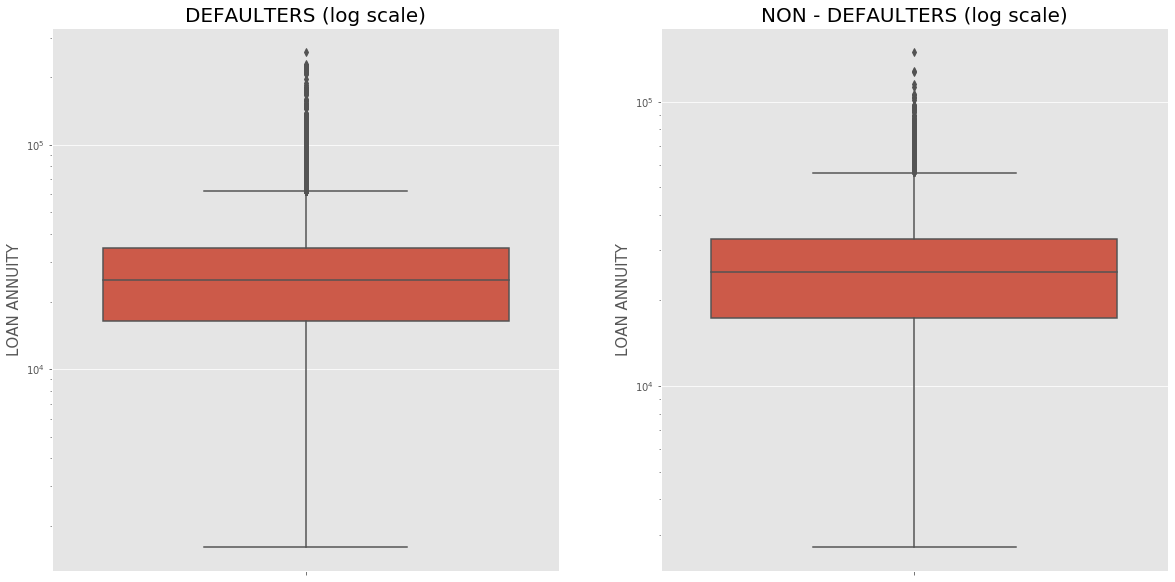

In [87]:
# For Annuity Variable:
# --------------------

plt.figure(figsize = (20,10))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.boxplot(df_target_0['AMT_ANNUITY'], orient = 'v')
plt.title('DEFAULTERS (log scale)', fontsize=20)
plt.ylabel('LOAN ANNUITY', fontsize=15)
plt.yscale('log')

plt.subplot(1,2,2)
sns.boxplot(df_target_1['AMT_ANNUITY'], orient = 'v')
plt.title('NON - DEFAULTERS (log scale)', fontsize=20)
plt.ylabel('LOAN ANNUITY', fontsize=15)
plt.yscale('log')

plt.show()

In [88]:
# Observations and Inferences
# ---------------------------
# - We see that for Loan Annuity, both types (i.e. Defaulters and Non-Defaulters) follow a similar trend of values,
#    with Non-Defaulters having a slighlty higher Inter-Quartile range.

In [89]:
# -------------------------------------------------------------------------------------------------------------------


### Analysis of Categorical and other Numerical Data

<br>

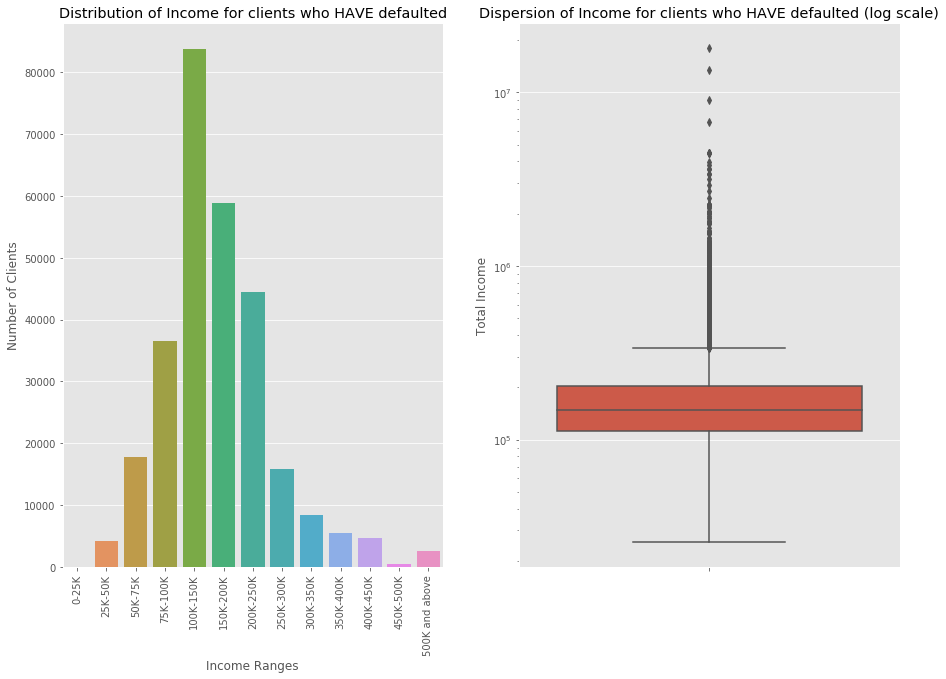

In [91]:
# Univariate Analysis: Count Plot for Total Income of a Client
# ------------------------------------------------------------
plt.style.use('ggplot')
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(df_target_0['AMT_INCOME_RANGE'])
plt.title('Distribution of Income for clients who HAVE defaulted')
plt.xticks(rotation=90)
plt.xlabel("Income Ranges")
plt.ylabel("Number of Clients")

plt.subplot(1,2,2)
sns.boxplot(df_target_0['AMT_INCOME_TOTAL'], orient = 'v')
plt.title('Dispersion of Income for clients who HAVE defaulted (log scale)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('Total Income')

plt.show()

In [92]:
df_target_0['AMT_INCOME_TOTAL'].describe().round(2)

count      282686.00
mean       169077.72
std        110476.27
min         25650.00
25%        112500.00
50%        148500.00
75%        202500.00
max      18000090.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [93]:
# Observations and Inferences
#------------------------------
#
# From the countplot - 
# ------------------
# - We see that clients with the income in range of 100 thousand to 150 thousand have the most number of Defaults.
# - The clients in the segment are in the count of 80,000+
# - We can infer that most defaulters are middle class people, 
#          in the salary range of 75 thousand to 250 thousand dollars.
# - We can also infer that the clients that have very low salary or very high salary less likely to defaults,
#
# From the boxplot - 
# ----------------
# - We can observe the majority of the values lie between 100 thousand dollars to 500 thousand dollars.
# --> From the boxplot we can infer that there are lot of outliers which are greater than the 75th percentile 
#       of the distribution. This means that there are clients who have very high incomes, but are still loan defaulters.

In [94]:
# --------------------------------------------------------------------------------------------------------------

In [95]:
# --------------------------------------------------------------------------------------------------------------

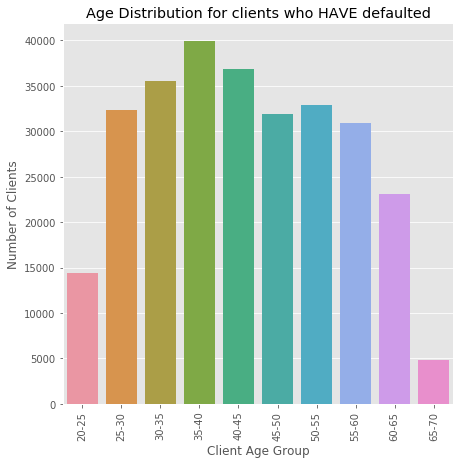

In [96]:
# Univariate Analysis for Age of clients who have defaulted
# ---------------------------------------------------------
plt.style.use('ggplot')
plt.figure(figsize = (7,7))

sns.countplot(df_target_0['AGE_RANGE'])
plt.title('Age Distribution for clients who HAVE defaulted')
plt.xticks(rotation=90)
#plt.yscale('log')
plt.xlabel("Client Age Group")
plt.ylabel("Number of Clients")

plt.show()


In [97]:
# Observations and Inferences
# ---------------------------
# 1)- We observe that people below the age of 25 and people above the age og 65 are less likely to default
# --> This can be so because people in the above age range are very less likely to take loans

# 2)- The age segment of 25 to 65 all have nearly the same number of defaulters.

# 3)- We can infer that age is not a very strong indicator of clients being defaulters

In [98]:
# --------------------------------------------------------------------------------------------------------------

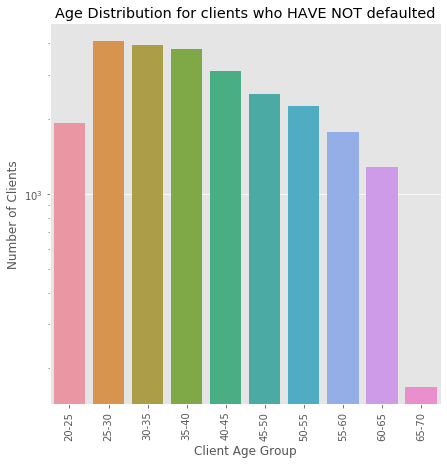

In [99]:
# Univariate Analysis for Age of clients who HAVE NOT defaulted
# -------------------------------------------------------------
plt.style.use('ggplot')
plt.figure(figsize = (7,7))

sns.countplot(df_target_1['AGE_RANGE'])
plt.title('Age Distribution for clients who HAVE NOT defaulted')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel("Client Age Group")
plt.ylabel("Number of Clients")

plt.show()

In [100]:
# Observation and Inferences
# --------------------------
# - We observe that that number of non-defaulters follows decreases with age.
# - We also observe that people in the age range of 20-25 are more likely to be non-defaulters.

# --> We can infer that people in age range of above 65 are less likely to take loans.

In [101]:
# --------------------------------------------------------------------------------------------------------------

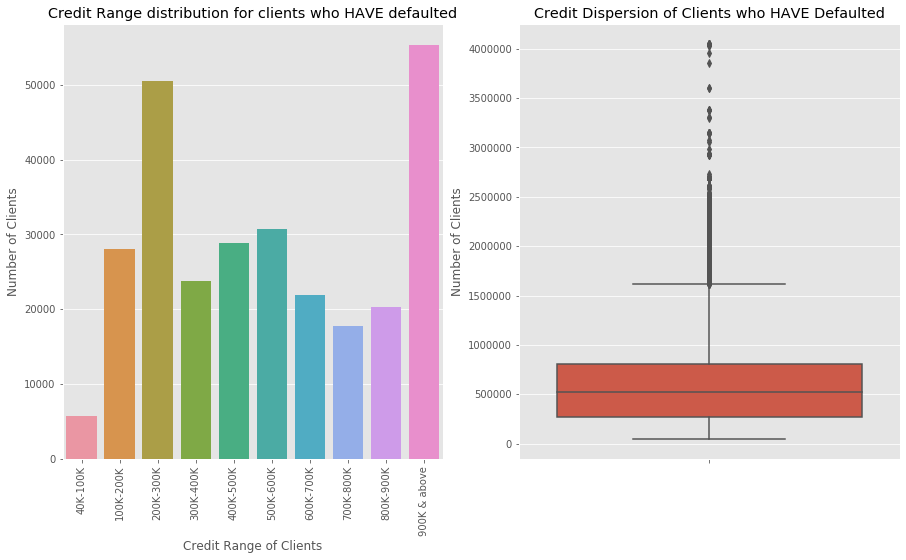

In [102]:
# Univariate analysis of Credit Amounts taken by the clients who HAVE defaulted
# -----------------------------------------------------------------------------

plt.style.use('ggplot')
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(df_target_0['AMT_CREDIT_RANGE'])
plt.title('Credit Range distribution for clients who HAVE defaulted')
plt.xticks(rotation=90)
#plt.yscale('log')
plt.xlabel("Credit Range of Clients")
plt.ylabel("Number of Clients")

plt.subplot(1,2,2)
sns.boxplot(df_target_0['AMT_CREDIT'], orient='v')
plt.title("Credit Dispersion of Clients who HAVE Defaulted")
plt.ylabel("Number of Clients")

plt.show()

In [103]:
df_target_0['AMT_CREDIT'].describe().round(2)

count     282686.00
mean      602648.28
std       406845.91
min        45000.00
25%       270000.00
50%       517788.00
75%       810000.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [104]:
# Observation and Inferences
# --------------------------
#
# From Bar Plot
# -------------
# 1) - We see that people who Deafult the most have either taken a very high loan, 
#        i.e. in the range of 900 thousand and above, OR 
#       have taken a loan in the range of 200 thousand to 300 thousand.
#
# From Box Plot
# -------------
# 1) - From the box plot we can observe that 75% of clients who have defauler have taken a loan amount in
#          the range of 45 thousand dollars and 81 thousand dollars.
# 2) - Apart from that quite a few outliers are present in the distribution.
#  --> From this it can be inferred that, there might have been some clients, who tool a huge loan to start a business, 
#      but have defaulted due to their business faulure or similar problems.

In [105]:
# --------------------------------------------------------------------------------------------------------------

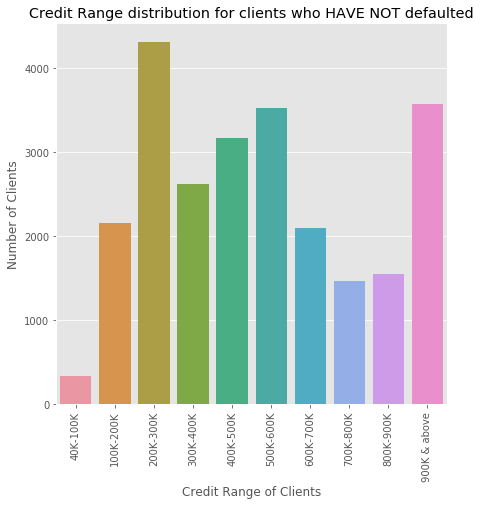

In [106]:
# Univariate analysis of Credit Amounts taken by the clients who HAVE NOT defaulted
# ---------------------------------------------------------------------------------
plt.style.use('ggplot')
plt.figure(figsize = (7,7))

sns.countplot(df_target_1['AMT_CREDIT_RANGE'])
plt.title('Credit Range distribution for clients who HAVE NOT defaulted')
plt.xticks(rotation=90)
#plt.yscale('log')
plt.xlabel("Credit Range of Clients")
plt.ylabel("Number of Clients")

plt.show()

In [107]:
# Observation and Inferences
# --------------------------
# 1) The number of clients who HAVE NOT defaulted follow a simliar pattern for their credit amount range
#        as compared to the clients who HAVE defaulted.


In [109]:
# --------------------------------------------------------------------------------------------------------------

In [110]:
# Univariate analysis Income Type of the clients those who HAVE defaulted
# ------------------------------------------------------------------------
df_target_0['NAME_INCOME_TYPE'].value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

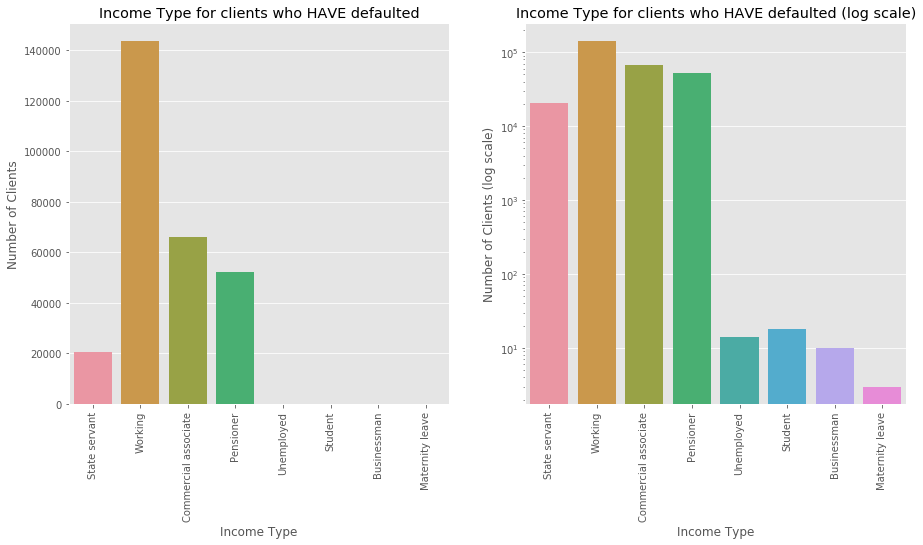

In [111]:
# Plotting for the same
# ---------------------

plt.style.use('ggplot')
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.countplot(df_target_0['NAME_INCOME_TYPE'])
plt.title('Income Type for clients who HAVE defaulted')
plt.xticks(rotation=90)
#plt.yscale('log')
plt.xlabel("Income Type")
plt.ylabel("Number of Clients")

plt.subplot(1,2,2)
sns.countplot(df_target_0['NAME_INCOME_TYPE'])
plt.title('Income Type for clients who HAVE defaulted (log scale)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel("Income Type")
plt.ylabel("Number of Clients (log scale)")

plt.show()


In [112]:
# Both the above graphs are the same.

In [113]:
# Observation and Inferences
# --------------------------
# 1) - We observe that the working class clients have the highest frequency of defaulters.
# 2) - We also observe that clients who are unemployed, students, businessman and 
#      clients who are on maternity leave have a low chance of defaulting.
#    --> We can infer that these clients have less probability of taking loans.

# 3) - We can also infer State Servents are comparitively less likely to Default, 
#      since they have a safe and regular salary.

In [114]:
# --------------------------------------------------------------------------------------------------------------

In [115]:
# --------------------------------------------------------------------------------------------------------------

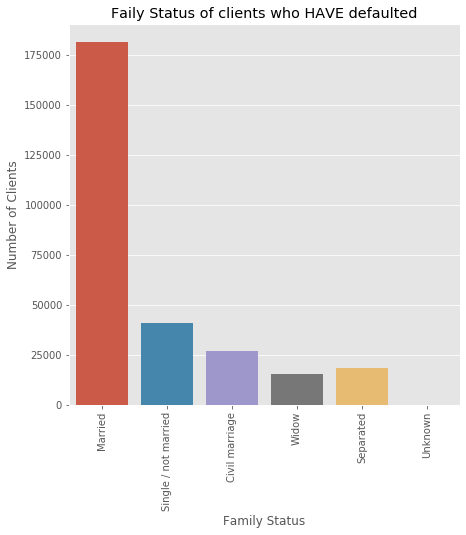

In [116]:
# Univariate Analysis for Family Status for Clients who have Defaulted
# --------------------------------------------------------------------
plt.style.use('ggplot')
plt.figure(figsize = (7,7))

sns.countplot(df_target_0['NAME_FAMILY_STATUS'])
plt.title('Faily Status of clients who HAVE defaulted')
plt.xticks(rotation=90)

plt.xlabel("Family Status")
plt.ylabel("Number of Clients")

plt.show()

In [117]:
# Observations and Inferences
# ---------------------------
# We observe that married people are more likely to default.
# We also observe that people who are widow or widower are less likely to default.

In [118]:
# --------------------------------------------------------------------------------------------------------------

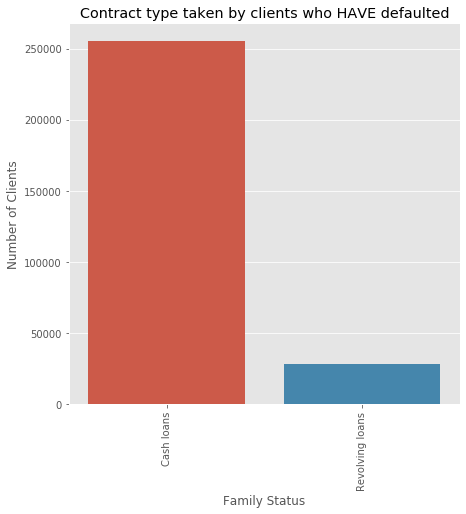

In [120]:
# Univariate Analysis for Family Status for Clients who HAVE Defaulted
# --------------------------------------------------------------------
plt.style.use('ggplot')
plt.figure(figsize = (7,7))

sns.countplot(df_target_0['NAME_CONTRACT_TYPE'])
plt.title('Contract type taken by clients who HAVE defaulted')
plt.xticks(rotation=90)

plt.xlabel("Family Status")
plt.ylabel("Number of Clients")

plt.show()

In [121]:
# Observations and Inferences
# ---------------------------
# - We observe that people who took cash loans are more likely to default as compared to revolving loans.

In [122]:
# --------------------------------------------------------------------------------------------------------------

In [123]:
# --------------------------------------------------------------------------------------------------------------

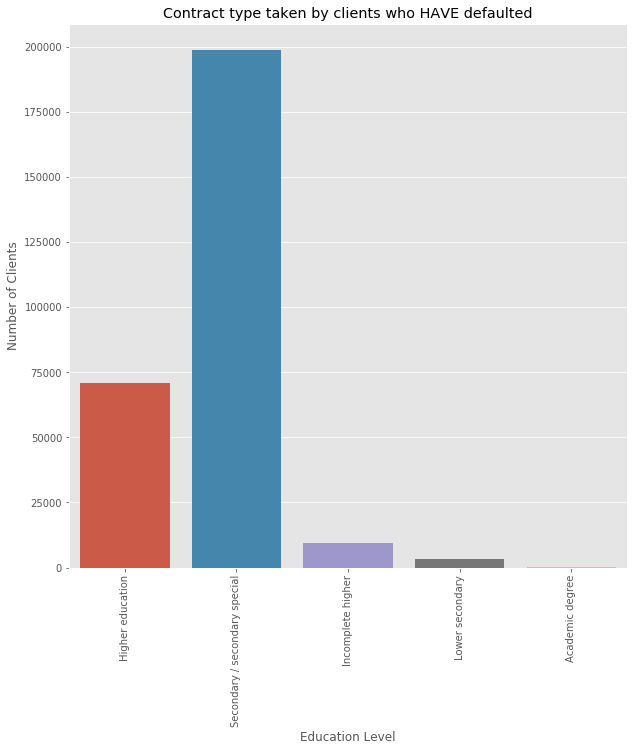

In [124]:
# Univariate analysis of education levels of clients who have defaulted
# ---------------------------------------------------------------------
plt.style.use('ggplot')
plt.figure(figsize = (10,10))

sns.countplot(df_target_0['NAME_EDUCATION_TYPE'])
plt.title('Contract type taken by clients who HAVE defaulted')
plt.xticks(rotation=90)

plt.xlabel("Education Level")
plt.ylabel("Number of Clients")

plt.show()


In [125]:
# Observations and Inferences
# ---------------------------
# 
# - We can clearly see that number of clients with only a secondary education have a very high probability to default
#      as compared to a client who has completed his/her higher education.
#
# From the above observation, we can infer the clients with higher with 
#  higher level of education might be earning weill and may be less susceptible to be a defaulter.

In [126]:
# --------------------------------------------------------------------------------------------------------------

In [127]:
# --------------------------------------------------------------------------------------------------------------

In [128]:
# Univariate analysis of organization type of clients who HAVE defaulted
# ----------------------------------------------------------------------

In [129]:
df_target_0['ORGANIZATION_TYPE'].value_counts().head(10)

Business Entity Type 3    61669
NOT-KNOWN                 52384
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Name: ORGANIZATION_TYPE, dtype: int64

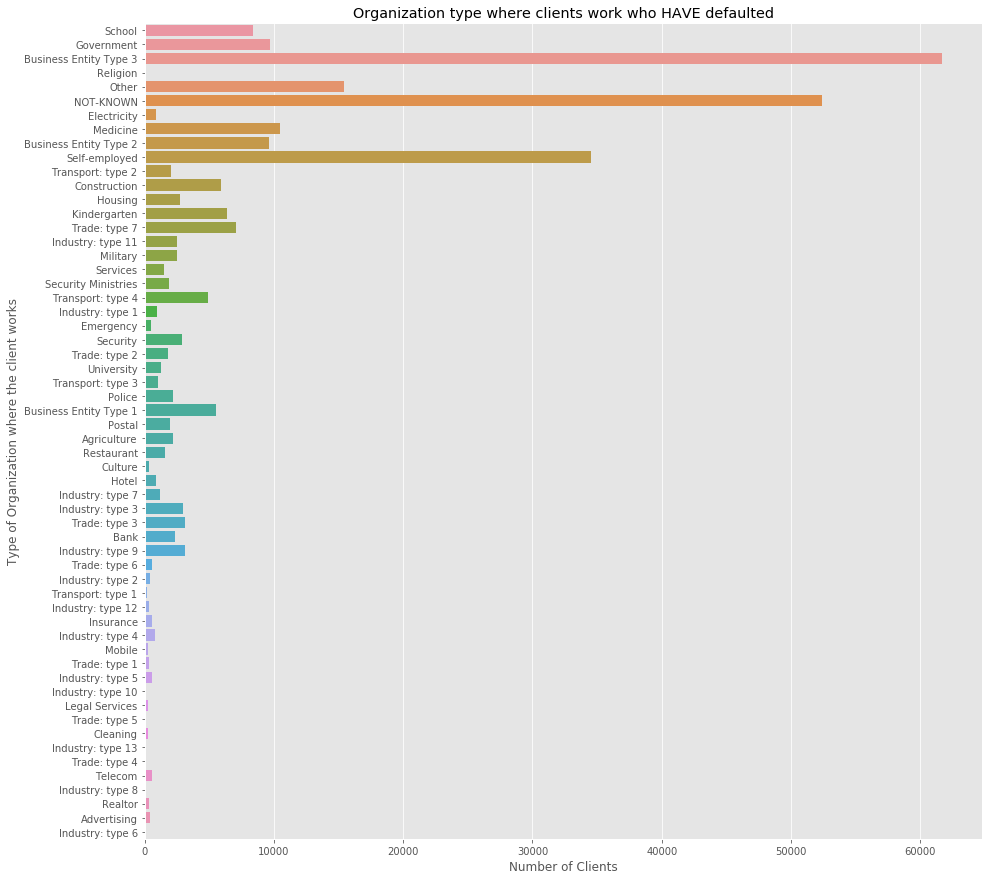

In [130]:
plt.style.use('ggplot')
plt.figure(figsize = (15,15))

sns.countplot(y = df_target_0['ORGANIZATION_TYPE'])

plt.title('Organization type where clients work who HAVE defaulted')
plt.xlabel('Number of Clients')
plt.ylabel('Type of Organization where the client works')

plt.show()

In [131]:
# Observations and Inferences:
# ---------------------------
#
# 1) - We observe that clients who work in a business entity are more likely to take loans and default.
# 2) - Another category of clients which are highly susceptible to Default are self-employed people.

In [132]:
# --------------------------------------------------------------------------------------------------------------

In [133]:
# --------------------------------------------------------------------------------------------------------------

<br><br>

## BI- VARIATE AND MULTI-VARIATE ANALYSIS

<br><br>

In [134]:
# Before we move further with Bi-variate and Multi-variate analysis, 
# it is important to find the correlations between various continuous/numerical variables.

In [135]:
# Let's first create a dataframe with columns required to find correlation
# ------------------------------------------------------------------------
corr_matrix = df1.corr().round(3)
corr_matrix


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE
SK_ID_CURR,1.000,-0.002,-0.001,-0.002,-0.000,-0.000,-0.000,0.001,0.001,0.001,0.001,0.000,-0.003,-0.001,-0.001,-0.000,0.001,0.003,-0.002,-0.002,0.000,0.001
TARGET,-0.002,1.000,0.019,-0.004,-0.030,-0.013,-0.040,-0.037,-0.078,-0.045,-0.042,-0.051,0.009,0.059,0.061,0.006,0.007,0.003,0.044,0.051,0.033,-0.078
CNT_CHILDREN,-0.001,0.019,1.000,0.013,0.002,0.021,-0.002,-0.026,-0.331,-0.240,-0.183,0.028,0.879,0.025,0.025,-0.013,0.008,0.015,0.020,0.071,0.070,-0.331
AMT_INCOME_TOTAL,-0.002,-0.004,0.013,1.000,0.157,0.192,0.160,0.075,-0.027,-0.064,-0.028,-0.009,0.016,-0.085,-0.092,0.031,0.062,0.058,0.004,0.006,0.008,-0.027
AMT_CREDIT,-0.000,-0.030,0.002,0.157,1.000,0.770,0.987,0.100,0.055,-0.067,-0.010,0.007,0.063,-0.102,-0.111,0.024,0.052,0.053,-0.027,-0.019,0.000,0.055
AMT_ANNUITY,-0.000,-0.013,0.021,0.192,0.770,1.000,0.775,0.118,-0.009,-0.104,-0.039,-0.011,0.076,-0.129,-0.142,0.041,0.079,0.075,-0.006,0.001,0.010,-0.009
AMT_GOODS_PRICE,-0.000,-0.040,-0.002,0.160,0.987,0.775,1.000,0.104,0.054,-0.065,-0.012,0.009,0.061,-0.104,-0.112,0.026,0.053,0.053,-0.027,-0.020,-0.001,0.053
REGION_POPULATION_RELATIVE,0.001,-0.037,-0.026,0.075,0.100,0.118,0.104,1.000,0.030,-0.004,0.054,0.004,-0.024,-0.533,-0.532,0.002,0.057,0.081,-0.050,-0.044,-0.015,0.030
DAYS_BIRTH,0.001,-0.078,-0.331,-0.027,0.055,-0.009,0.054,0.030,1.000,0.616,0.332,0.273,-0.279,-0.009,-0.008,-0.065,-0.096,-0.070,-0.180,-0.242,-0.159,1.000
DAYS_EMPLOYED,0.001,-0.045,-0.240,-0.064,-0.067,-0.104,-0.065,-0.004,0.616,1.000,0.210,0.272,-0.234,0.033,0.035,-0.036,-0.107,-0.096,-0.091,-0.255,-0.218,0.616


<br><br>
#### TOP 10 VALUES OF THE CORRELATION
<br><br>

In [136]:
# Let's get a better detail of column comparison with higher correlation
# ----------------------------------------------------------------------

def get_redundant_pairs(df):
##Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
# ----------------------------------------------------------------------
def get_top_abs_correlations(df,n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[1:n]

# We will not consider index 0 as it is DAYS_BIRTH and AGE.
# AGE is derived from DAYS_BIRTH so it has perfect positive correlation and thus we ignore it.

# TOP 10 values of CORRELATION
# ----------------------------
top10_corr=pd.DataFrame(get_top_abs_correlations(corr_matrix,11).reset_index())
top10_corr.columns=['Variable 1','Variable 2','Correlation']
top10_corr

,Variable 1,Variable 2,Correlation
0,AMT_CREDIT,AMT_GOODS_PRICE,0.999885
1,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.998678
2,CNT_CHILDREN,CNT_FAM_MEMBERS,0.989672
3,AMT_ANNUITY,AMT_GOODS_PRICE,0.963801
4,AMT_CREDIT,AMT_ANNUITY,0.962958
5,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.948332
6,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.930532
7,DAYS_BIRTH,DAYS_EMPLOYED,0.903728
8,DAYS_EMPLOYED,AGE,0.903727
9,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,0.866640


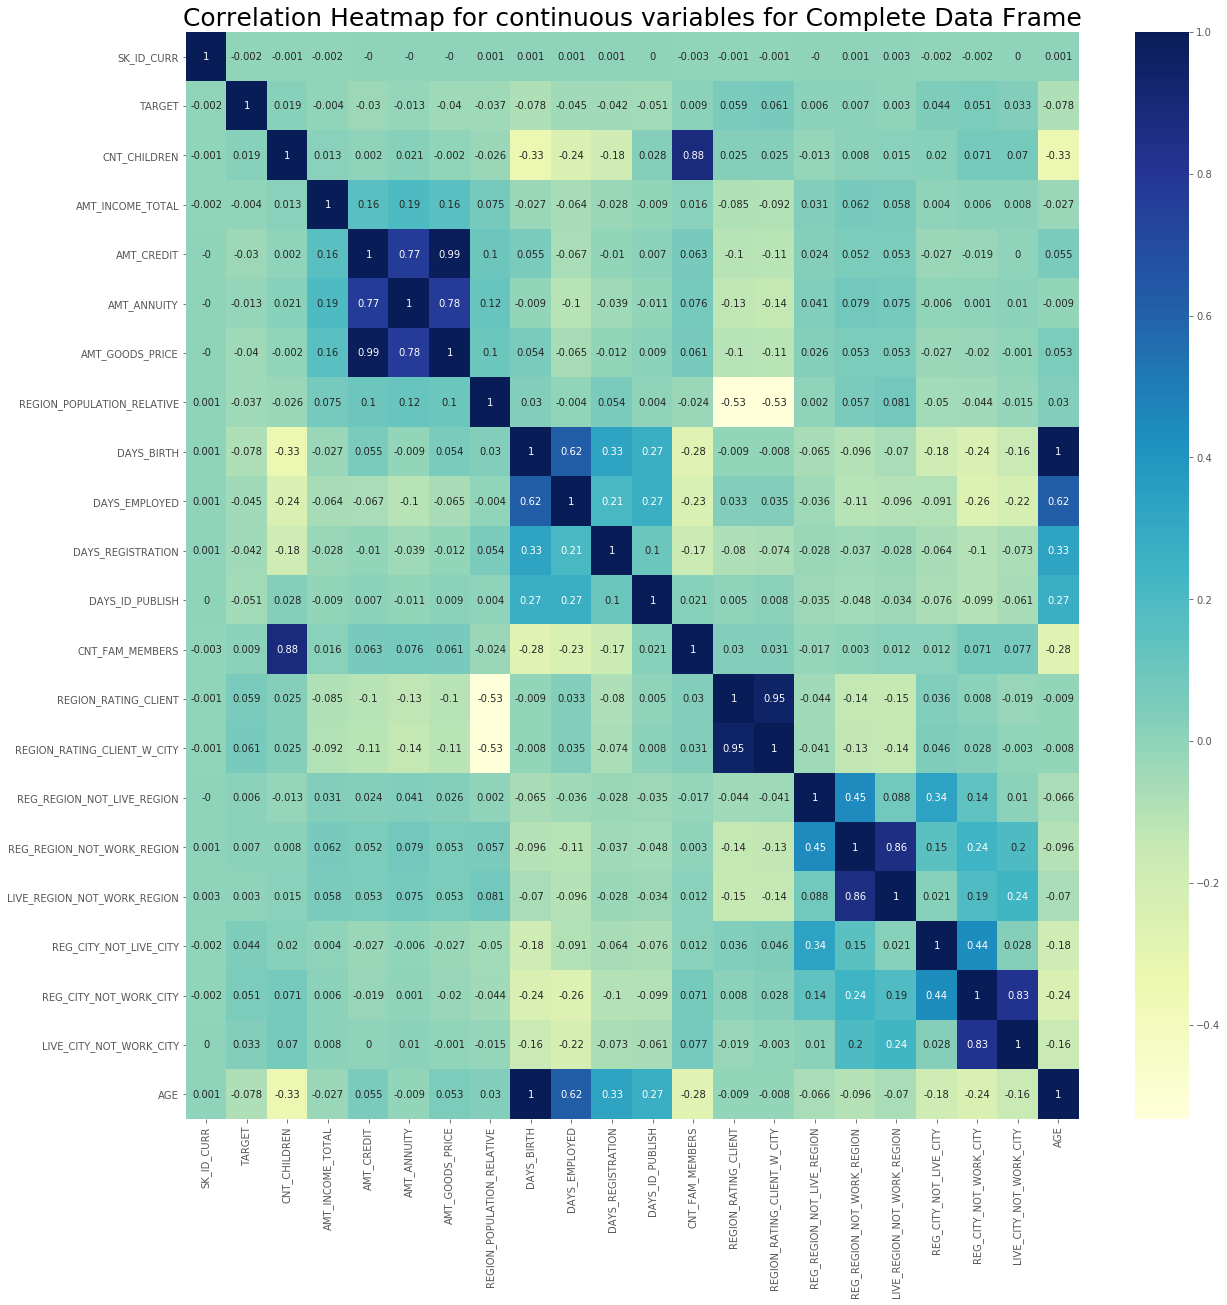

In [137]:
# Since we are not able to get a clearer idea of the correlation from the matrix above.
# Thus we will plot a heatmap for the same to get a better idea.

plt.figure(figsize=[20,20])
sns.heatmap(corr_matrix, cmap = 'YlGnBu', annot=True)
plt.title('Correlation Heatmap for continuous variables for Complete Data Frame', fontsize = 25)
plt.show()

In [138]:
# Observations and Inferences
# ---------------------------
# 1 - We find that the highest correlation exists between Credit Amount and the Goods Price. 
#     We can infer that the loan amount must be taken to buy the goods.
#
# 2 - We also find a very high correlation between Credt Amount and Loan Annuity Amount.
# 
# 3 - We can also observe a high correlation between days after birth and the days after starting work.
#
# 4 - There is also a high correlation between LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION.
#     It can be inferred that there is a high probability where a person who did not mention his/her permanent address as
#     work address will not have mentioned his/her contact address as work address.
#
# 5 - There is also a high correlation between LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY.
#     It can be inferred that there is a high probabilit where a person who did not mention his/her permanent address as
#     work address will not have mentioned his/her contact address as work address.
#
# 6 - Credit Amount and Age show negative correlation. 
#     It can be inferred that credit amount is higher for low age and vice-versa.
#
# 7 - There is a negative correlation between Region_population_Relative and CNT_CHILDREN.
#     It can be inferred that clients with less chilren live in densely populated areas.
#
# 8 - We observe a positive correlation between Credit amount and Region_Population_Relative
#     We can infer that people living in densely populated region take higher amount loans.
#
# 9 - We also observe a positive correlation between clients income amount and Region_Population_Relative
#      It can be inferred that clients living in densely populated region have a higher income.
#
# --------------------------------------------------------------------------------------------------------------------

In [139]:
# --------------------------------------------------------------------------------------------------------------------

In [140]:
# Now let's move onto the multivariate analysis

In [141]:
target_0 = df_target_0
target_1 = df_target_1

In [142]:
# --------------------------------------------------------------------------------------------------------------------

In [143]:
# --------------------------------------------------------------------------------------------------------------------

<Figure size 720x720 with 0 Axes>

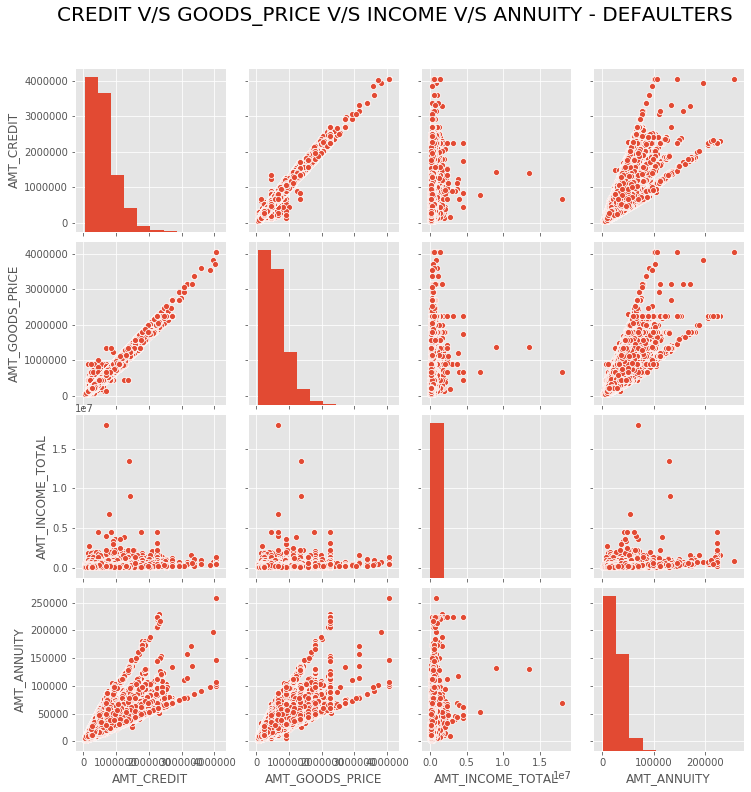

In [144]:
# Pair plot for CREDIT V/S GOODS_PRICE V/S INCOME V/S ANNUITY for DEFAULTERS
# --------------------------------------------------------------------------
plt.figure(figsize = (10,10))

g = sns.pairplot(target_0[['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL','AMT_ANNUITY']])
g.fig.suptitle("CREDIT V/S GOODS_PRICE V/S INCOME V/S ANNUITY - DEFAULTERS", fontsize = 20,y=1.08) 

plt.show()

<Figure size 720x720 with 0 Axes>

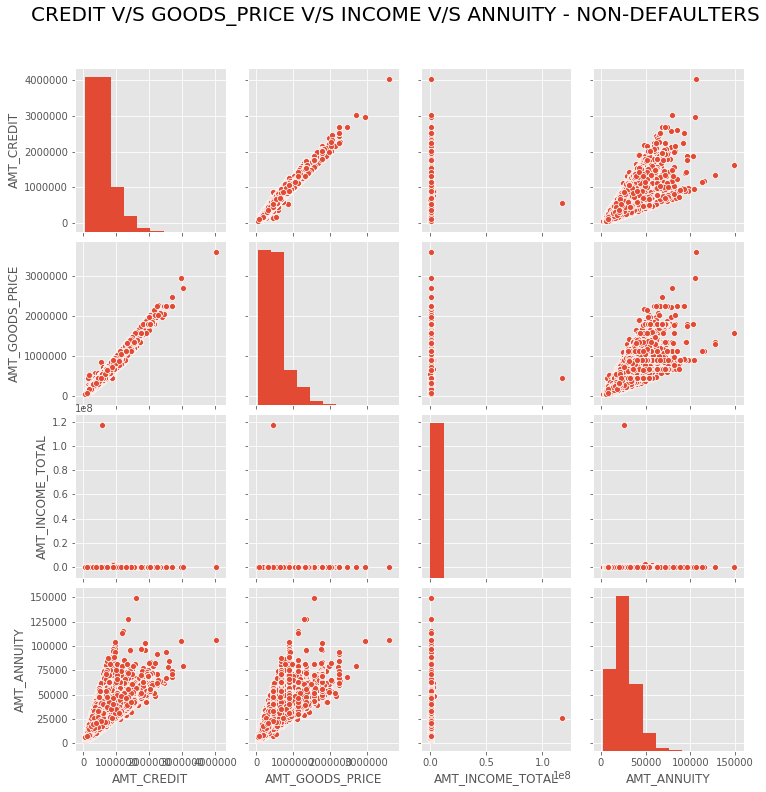

In [145]:
# Pair plot for CREDIT V/S GOODS_PRICE V/S INCOME V/S ANNUITY for NON-DEFAULTERS
# ------------------------------------------------------------------------------
plt.figure(figsize = (10,10))

g = sns.pairplot(target_1[['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL','AMT_ANNUITY']])
g.fig.suptitle("CREDIT V/S GOODS_PRICE V/S INCOME V/S ANNUITY - NON-DEFAULTERS", fontsize = 20,y=1.08) 

plt.show()

In [146]:
# Observations and Inferences
# ---------------------------
#
#Comparing the pairplots of clients with payment difficulties and all other cases, we observe:
# - The clients having low income are more likely to default. 
#      There seem to be no defaulters having a higher income.
# - The more is the goods price, the higher credit is available in both the cases.
# - In the case of default, a very high credit is not available even if the price of goods is high 
#      while in all other cases a higher credit may be available in case of a high goods price.

In [147]:
# --------------------------------------------------------------------------------------------------------------------

In [148]:
# --------------------------------------------------------------------------------------------------------------------

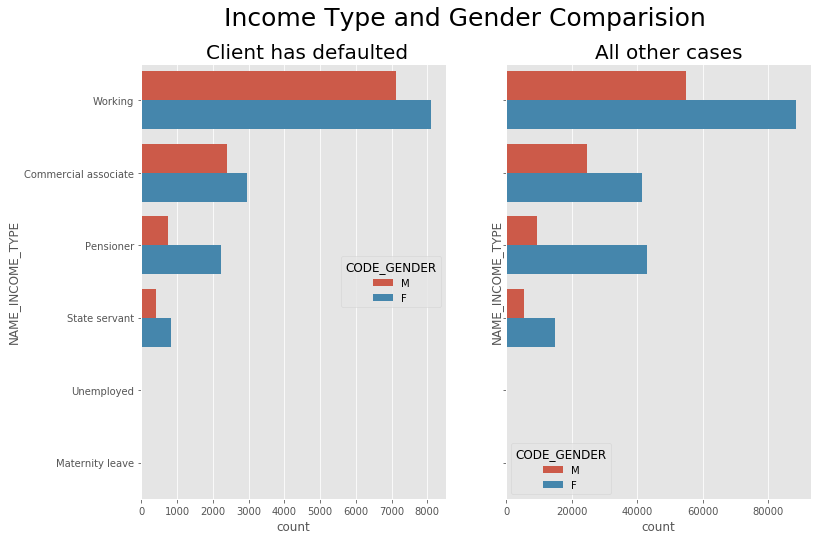

In [157]:
# Bivariate Analysis for Income Type vs Gender
# --------------------------------------------

fig, ax = plt.subplots(1,2,figsize = [12,8], sharey=True)
sns.countplot(data = target_0, y= 'NAME_INCOME_TYPE', order=target_0['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER', ax = ax[1],hue_order='MF')
sns.countplot(data = target_1, y= 'NAME_INCOME_TYPE', order=target_1['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER', ax = ax[0])
fig.text(0.2, 0.89, 'Client has defaulted', fontsize = 20)
fig.text(0.65, 0.89, 'All other cases', fontsize = 20)
fig.suptitle('Income Type and Gender Comparision', fontsize = 25)
plt.show()

In [158]:
# Observations and Inferences
# ---------------------------
# - There are no cases of default in the case of students and businessman.
# - The proportion of females in case of all income types is higher 
#      as compared to males in case of all other cases than in case of default.
#

In [159]:
# ----------------------------------------------------------------------------------------------------------------

In [160]:
# ----------------------------------------------------------------------------------------------------------------

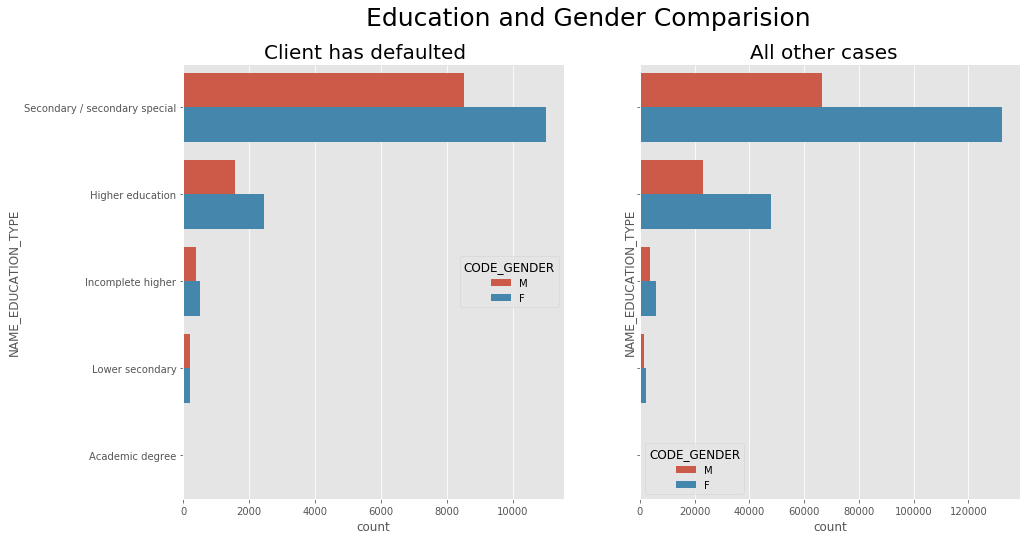

In [161]:
# Bivariate Analysis Education Level VS Gender
# --------------------------------------------

fig, ax = plt.subplots(1,2,figsize = [15,8], sharey=True)
sns.countplot(data = target_0, y= 'NAME_EDUCATION_TYPE', order=target_0['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'CODE_GENDER', ax = ax[1],hue_order='MF')
sns.countplot(data = target_1, y= 'NAME_EDUCATION_TYPE', order=target_1['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'CODE_GENDER', ax = ax[0])
fig.text(0.2, 0.89, 'Client has defaulted', fontsize = 20)
fig.text(0.65, 0.89, 'All other cases', fontsize = 20)
fig.suptitle('Education and Gender Comparision', fontsize = 25)
plt.show()

In [162]:
# Observations and Inferences
# ---------------------------
# - A large number of applications are by people having secondary education 
#     followed Higher Education both in the case of payment difficulties and all other cases.
# - Female applicants are more than male applicants in all cases
#

In [163]:
# ----------------------------------------------------------------------------------------------------------------

In [164]:
# ----------------------------------------------------------------------------------------------------------------

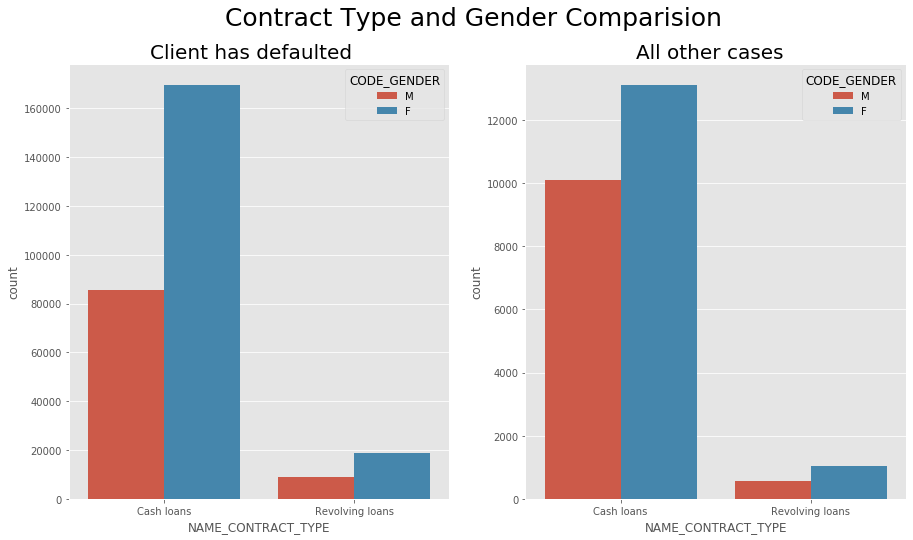

In [165]:
# Bivariate Analysis for Contract Type vs Gender
# ----------------------------------------------

fig, ax = plt.subplots(1,2,figsize = [15,8])
sns.countplot(data=target_0, x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',ax = ax[0], hue_order='MF')
sns.countplot(data=target_1, x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',ax = ax[1])
fig.text(0.2, 0.89, 'Client has defaulted', fontsize = 20)
fig.text(0.65, 0.89, 'All other cases', fontsize = 20)
fig.suptitle('Contract Type and Gender Comparision', fontsize = 25)
plt.show()


In [166]:
# Observations and Inferences
# ---------------------------
# The proportion of no-default by females is higher than males in case of cash loans when compared with default.
# 

In [167]:
# ---------------------------------------------------------------------------------------------------------------

In [168]:
# ---------------------------------------------------------------------------------------------------------------

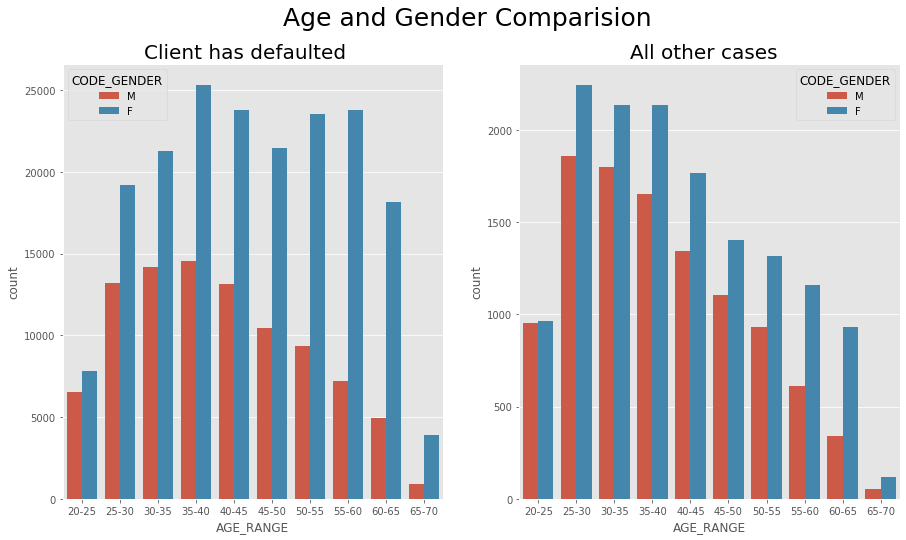

In [169]:
# Bivariate Analysis for Age vs Gender
# ------------------------------------

fig, ax = plt.subplots(1,2,figsize = [15,8])

sns.countplot(data=target_0,x='AGE_RANGE', ax=ax[0], hue='CODE_GENDER', hue_order='MF')
sns.countplot(data=target_1,x='AGE_RANGE', ax=ax[1], hue='CODE_GENDER')
fig.text(0.2, 0.89, 'Client has defaulted', fontsize = 20)
fig.text(0.65, 0.89, 'All other cases', fontsize = 20)
fig.suptitle('Age and Gender Comparision', fontsize = 25)
plt.show()

In [170]:
# Observations and Inferences
# ---------------------------
# - With the increase in age, there is a decreasing trend of applications in all cases.
# - The females are less likely to default from the ages 25 to 65 while 
#    the possibility of default is decreasing with increase in age.
# - Overall, the age group of 25 to 45 is less likely to default.
#

In [171]:
# ---------------------------------------------------------------------------------------------------------------

In [172]:
# ---------------------------------------------------------------------------------------------------------------

In [173]:
# Multivariate Analysis for Credit Amount to Reality owning status for various housing type categories for the clients
# --------------------------------------------------------------------------------------------------------------------

In [174]:
Housing_Type=target_0['NAME_HOUSING_TYPE'].unique().tolist()

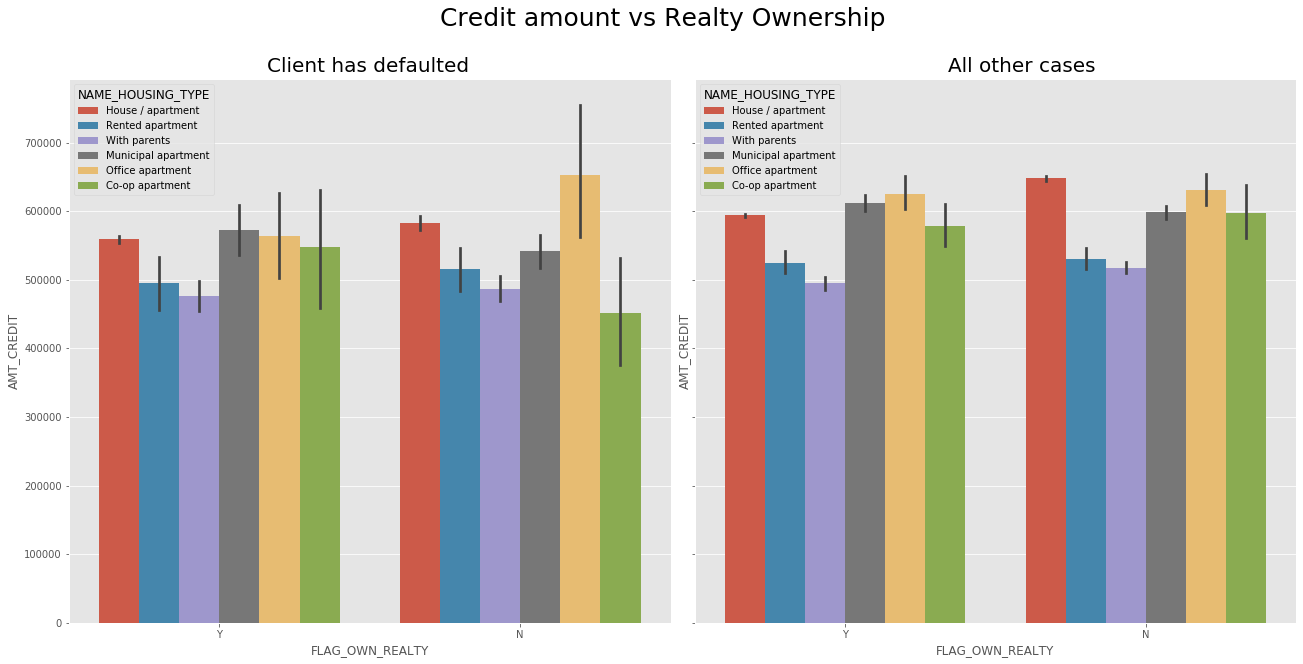

In [175]:
fig, ax = plt.subplots(1,2,figsize = [22,10], sharey=True)
fig.text(0.25, 0.89, 'Client has defaulted', fontsize = 20)

fig.text(0.68, 0.89, 'All other cases', fontsize = 20)
fig.suptitle('Credit amount vs Realty Ownership', fontsize = 25)
sns.barplot(data =target_0, x='FLAG_OWN_REALTY',y='AMT_CREDIT', hue ='NAME_HOUSING_TYPE',ax=ax[1], order=['Y','N'])
sns.barplot(data =target_1, x='FLAG_OWN_REALTY',y='AMT_CREDIT', hue ='NAME_HOUSING_TYPE',ax=ax[0], hue_order=Housing_Type)
plt.subplots_adjust(wspace=0.04)


plt.show()

In [176]:
# Observations and Inferences
# ---------------------------
# - The Office apartment which are not owned by the client have a higher default as 
#      compared to the office apartment owned by client.
# - The default possibility is less in the case the Co-op Apartments not owned by 
#      client as compared to all other cases.
#

In [177]:
# ---------------------------------------------------------------------------------------------------------------

In [178]:
# ---------------------------------------------------------------------------------------------------------------

In [179]:
# Multivariate Analysis for Credit Amount to Client's Education status for various categories of family status.
# ------------------------------------------------------------------------------------------------------------

In [180]:
family_status=target_0['NAME_FAMILY_STATUS'].unique().tolist()
Education_Type=target_0['NAME_EDUCATION_TYPE'].unique().tolist()

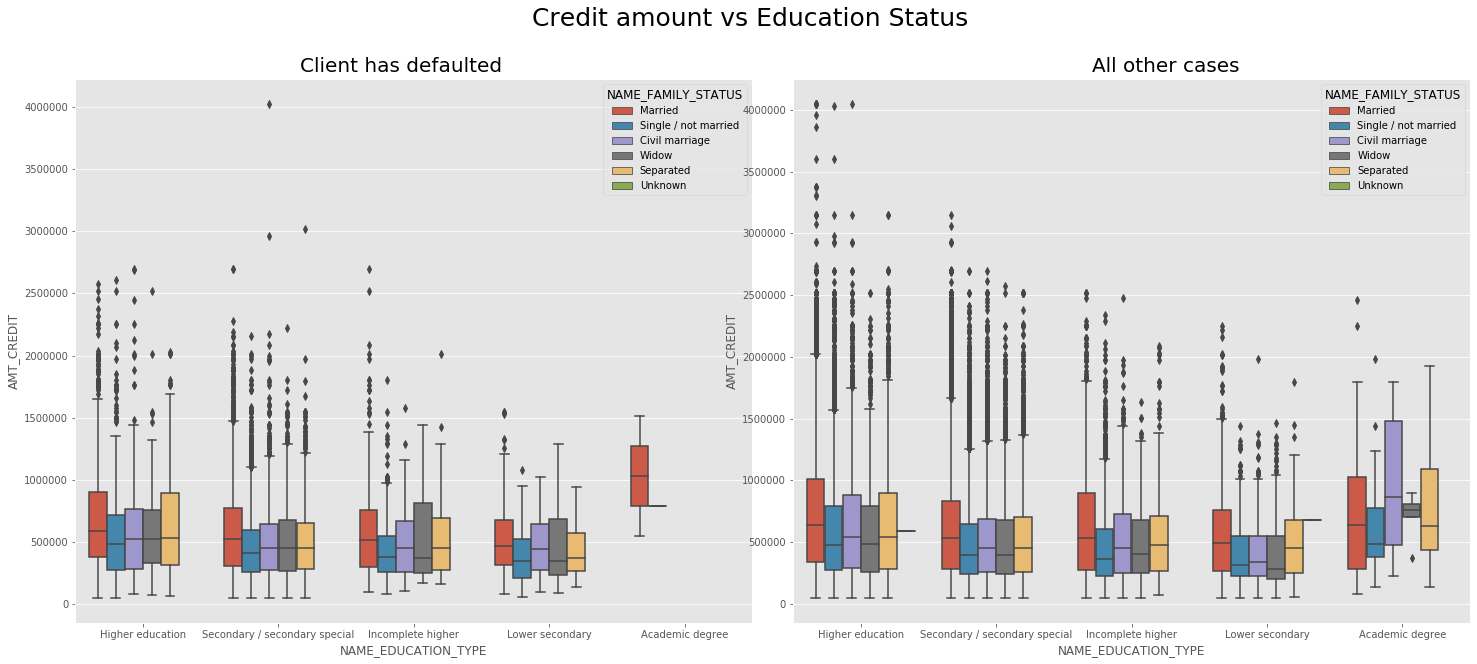

In [181]:
fig, ax = plt.subplots(1,2,figsize = [25,10])

sns.boxplot(data =target_0, 
            x='NAME_EDUCATION_TYPE',
            y='AMT_CREDIT', 
            hue ='NAME_FAMILY_STATUS',
            orient='v', 
            ax=ax[1],
            order=Education_Type)

sns.boxplot(data =target_1, 
            x='NAME_EDUCATION_TYPE',
            y='AMT_CREDIT', 
            hue ='NAME_FAMILY_STATUS',
            orient='v', 
            ax=ax[0], 
            hue_order=family_status, 
            order=Education_Type)

fig.suptitle('Credit amount vs Education Status', fontsize = 25)
fig.text(0.25, 0.89, 'Client has defaulted', fontsize = 20)
fig.text(0.69, 0.89, 'All other cases', fontsize = 20)
plt.subplots_adjust(wspace=0.06)

plt.show()


In [182]:
# Observations and Inferences
# ---------------------------

# - The median credit amount is the highest in case of married person having an academic degree.
# - The credit maount of people in civil marriage having an academic degree are mostly in the third quartile.
# - The education type 'Academic Degree' has the least outliers, which means 
#     there is not much variability in the credit amount of this category.



In [184]:
# ---------------------------------------------------------------------------------------------------------------

<br><br>

## Taking information from the Previous_Data dataset.

<br><br><br>

In [185]:
prev_app = pd.read_csv('previous_application.csv')

In [186]:
# Checking the shape of the dataset
# ---------------------------------
prev_app.shape

(1670214, 37)

In [187]:
# Checking the various information in the dataset
# ----------------------------------------------
prev_app.describe().round(2)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.0,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.4,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.5,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.9,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.0,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.0,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.0,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.14,6905160.00,6905160.00,3060045.0,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [188]:
# Checking the column details of the dataset
# ------------------------------------------
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [189]:
# Here we can observe that there are quite a few columns with null values.

# Lets the check the percentage of NULL values in the columns
# ------------------------------------------------------
show_null_percentage(prev_app, False)

--------------------------------------------------------------------------------------
AMT_ANNUITY : 					 22.0
--------------------------------------------------------------------------------------
AMT_DOWN_PAYMENT : 					 54.0
--------------------------------------------------------------------------------------
AMT_GOODS_PRICE : 					 23.0
--------------------------------------------------------------------------------------
RATE_DOWN_PAYMENT : 					 54.0
--------------------------------------------------------------------------------------
RATE_INTEREST_PRIMARY : 					 100.0
--------------------------------------------------------------------------------------
RATE_INTEREST_PRIVILEGED : 					 100.0
--------------------------------------------------------------------------------------
NAME_TYPE_SUITE : 					 49.0
--------------------------------------------------------------------------------------
CNT_PAYMENT : 					 22.0
------------------------------------------------------------

In [190]:
# To get rid of NULL values we will remove those columns who have NULL values of more than 13%
# --------------------------------------------------------------------------------------------
null_col_13_percent = prev_app.isnull().sum()
null_col_13_percent = null_col_13_percent[null_col_13_percent > (0.13 * len(prev_app))]

removing_null_13_per = list(null_col_13_percent.index)
prev_app.drop(labels = removing_null_13_per, axis=1, inplace = True)


In [191]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [192]:
# The columns remaining are - 
# -------------------------
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [193]:
# Dropping Unwanted columns 
# -------------------------

unwanted_col_list = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','NAME_CASH_LOAN_PURPOSE', 'NAME_PRODUCT_TYPE','SELLERPLACE_AREA']

prev_app.drop(labels = unwanted_col_list, axis=1, inplace=True)

In [194]:
# Listing the null values
# -----------------------
show_null_count(prev_app, False)

--------------------------------------------------------------------------------------
AMT_CREDIT : 					 1
--------------------------------------------------------------------------------------
PRODUCT_COMBINATION : 					 346


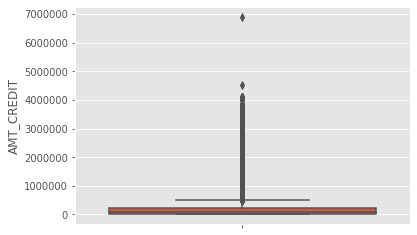

In [195]:
# Looking at AMT_CREDIT variable
# ------------------------------
sns.boxplot(prev_app['AMT_CREDIT'], orient='v')
plt.show()

In [196]:
# Since there are lot of outliers present in the data, the mean can be severely affected.
# So we replace the missing value with median
prev_app['AMT_CREDIT'] = prev_app['AMT_CREDIT'].fillna(prev_app['AMT_CREDIT'].median())

In [197]:
# Listing the null values
# -----------------------
prev_app.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_APPLICATION           0
AMT_CREDIT                0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
CHANNEL_TYPE              0
NAME_SELLER_INDUSTRY      0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION     346
dtype: int64

In [198]:
# Listing the null values
# -----------------------
show_null_count(prev_app, False)

--------------------------------------------------------------------------------------
PRODUCT_COMBINATION : 					 346


In [199]:
# Looking at the PRODUCT_COMBINATION variable
# -------------------------------------------
prev_app['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [200]:
# Since it is a categorical variable, we should replace the NULL values with mode
# -------------------------------------------------------------------------------
prev_app['PRODUCT_COMBINATION'] = prev_app['PRODUCT_COMBINATION'].fillna(prev_app['PRODUCT_COMBINATION'].mode()[0])

In [201]:
# Listing the null values
# -----------------------
show_null_count(prev_app, False)

In [202]:
# We see that no NaN values are left in the dataframe.

In [203]:
# Cleaning columns and rows with values as - 'XNA' and 'XAP'.
# ----------------------------------------------------------

In [204]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1670214 non-null  int64  
 1   SK_ID_CURR            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE    1670214 non-null  object 
 3   AMT_APPLICATION       1670214 non-null  float64
 4   AMT_CREDIT            1670214 non-null  float64
 5   NAME_CONTRACT_STATUS  1670214 non-null  object 
 6   DAYS_DECISION         1670214 non-null  int64  
 7   NAME_PAYMENT_TYPE     1670214 non-null  object 
 8   CODE_REJECT_REASON    1670214 non-null  object 
 9   NAME_CLIENT_TYPE      1670214 non-null  object 
 10  NAME_GOODS_CATEGORY   1670214 non-null  object 
 11  NAME_PORTFOLIO        1670214 non-null  object 
 12  CHANNEL_TYPE          1670214 non-null  object 
 13  NAME_SELLER_INDUSTRY  1670214 non-null  object 
 14  NAME_YIELD_GROUP      1670214 non-

In [205]:
# Checking 'CODE_REJECT_REASON' column - 
# -------------------------------------
prev_app['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [206]:
# We see a lot of values as XAP here, but the column is important, 
# so we will get rid of the rows that have XNA or XAP values

In [207]:
prev_app.drop(prev_app[prev_app['CODE_REJECT_REASON'] == 'XNA'].index, axis=0 ,inplace = True)
prev_app.drop(prev_app[prev_app['CODE_REJECT_REASON'] == 'XAP'].index, axis=0 ,inplace = True)

In [208]:
prev_app.shape

(311877, 16)

In [209]:
# Checking the 'NAME_CLIENT_TYPE' column
# --------------------------------------

prev_app['NAME_CLIENT_TYPE'].value_counts()

Repeater     276546
Refreshed     18690
New           16259
XNA             382
Name: NAME_CLIENT_TYPE, dtype: int64

In [210]:
# We will do the same as above here too.
prev_app.drop(prev_app[prev_app['NAME_CLIENT_TYPE'] == 'XNA'].index, axis=0 ,inplace = True)

In [211]:
prev_app.shape

(311495, 16)

In [212]:
prev_app['NAME_GOODS_CATEGORY'].value_counts()

XNA                         220552
Mobile                       37535
Computers                    17244
Consumer Electronics          9915
Audio/Video                   9864
Furniture                     4525
Photo / Cinema Equipment      3528
Construction Materials        2491
Clothing and Accessories      2082
Auto Accessories               768
Jewelry                        602
Homewares                      480
Vehicles                       373
Medical Supplies               302
Sport and Leisure              256
Office Appliances              242
Tourism                        196
Gardening                      196
Other                          122
Medicine                       102
Direct Sales                    74
Education                       14
Insurance                       12
Additional Service              10
Weapon                           7
Fitness                          2
House Construction               1
Name: NAME_GOODS_CATEGORY, dtype: int64

In [213]:
# Since this is an important column, we will delete the number of rows here that have the 'XNA' value
# ---------------------------------------------------------------------------------------------------
prev_app.drop(prev_app[prev_app['NAME_GOODS_CATEGORY'] == 'XNA'].index, axis=0 ,inplace = True)

In [214]:
prev_app.shape

(90943, 16)

In [215]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90943 entries, 36 to 1670197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SK_ID_PREV            90943 non-null  int64  
 1   SK_ID_CURR            90943 non-null  int64  
 2   NAME_CONTRACT_TYPE    90943 non-null  object 
 3   AMT_APPLICATION       90943 non-null  float64
 4   AMT_CREDIT            90943 non-null  float64
 5   NAME_CONTRACT_STATUS  90943 non-null  object 
 6   DAYS_DECISION         90943 non-null  int64  
 7   NAME_PAYMENT_TYPE     90943 non-null  object 
 8   CODE_REJECT_REASON    90943 non-null  object 
 9   NAME_CLIENT_TYPE      90943 non-null  object 
 10  NAME_GOODS_CATEGORY   90943 non-null  object 
 11  NAME_PORTFOLIO        90943 non-null  object 
 12  CHANNEL_TYPE          90943 non-null  object 
 13  NAME_SELLER_INDUSTRY  90943 non-null  object 
 14  NAME_YIELD_GROUP      90943 non-null  object 
 15  PRODUCT_COMBINAT

In [216]:
# We see that we have taken care of all XNA and XAP values.

In [217]:
# So it is time we merge our datasets.

In [218]:
df2_merged = pd.merge(left=df1, right=prev_app, how='inner', on='SK_ID_CURR') #, suffixes='_x')

In [219]:
df2_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,19334,-3494,2419.0,2893,2.0,2,2,SATURDAY,0,0,0,0,0,0,Business Entity Type 3,75K-100K,200K-300K,52,50-55,2197792,Consumer loans,33250.500,33250.500,Refused,-1788,Cash through the bank,LIMIT,Refreshed,Mobile,XNA,Country-wide,Connectivity,XNA,POS mobile with interest
1,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,19334,-3494,2419.0,2893,2.0,2,2,SATURDAY,0,0,0,0,0,0,Business Entity Type 3,75K-100K,200K-300K,52,50-55,1583574,Consumer loans,36720.000,36720.000,Refused,-1849,Cash through the bank,LIMIT,Refreshed,Mobile,XNA,Country-wide,Connectivity,XNA,POS mobile with interest
2,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,19334,-3494,2419.0,2893,2.0,2,2,SATURDAY,0,0,0,0,0,0,Business Entity Type 3,75K-100K,200K-300K,52,50-55,1883850,Consumer loans,33660.000,30294.000,Refused,-2193,XNA,LIMIT,Repeater,Furniture,POS,Stone,Furniture,high,POS industry with interest
3,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,19334,-3494,2419.0,2893,2.0,2,2,SATURDAY,0,0,0,0,0,0,Business Entity Type 3,75K-100K,200K-300K,52,50-55,1625550,Consumer loans,21969.225,21969.225,Refused,-840,Cash through the bank,LIMIT,Refreshed,Mobile,XNA,Country-wide,Connectivity,XNA,POS mobile with interest
4,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,19334,-3494,2419.0,2893,2.0,2,2,SATURDAY,0,0,0,0,0,0,Business Entity Type 3,75K-100K,200K-300K,52,50-55,1354305,Consumer loans,33561.000,27954.000,Refused,-1266,Cash through the bank,LIMIT,Refreshed,Photo / Cinema Equipment,POS,Country-wide,Connectivity,low_normal,POS mobile without interest


In [220]:
df2_merged.shape

(77533, 51)

In [221]:
df2_merged.TARGET.value_counts()

0    69829
1     7704
Name: TARGET, dtype: int64

In [222]:
# Dividing the dataset into 2 datasets
# One with Target value = 0
# The other with target value = 1

In [223]:
df2_merged_target_0 = df2_merged.loc[df2_merged['TARGET']==0]
df2_merged_target_1 = df2_merged.loc[df2_merged['TARGET']==1]

In [224]:
df2_merged_target_0.shape

(69829, 51)

In [225]:
df2_merged_target_1['NAME_CONTRACT_STATUS'].value_counts()

Refused         5868
Unused offer    1836
Name: NAME_CONTRACT_STATUS, dtype: int64

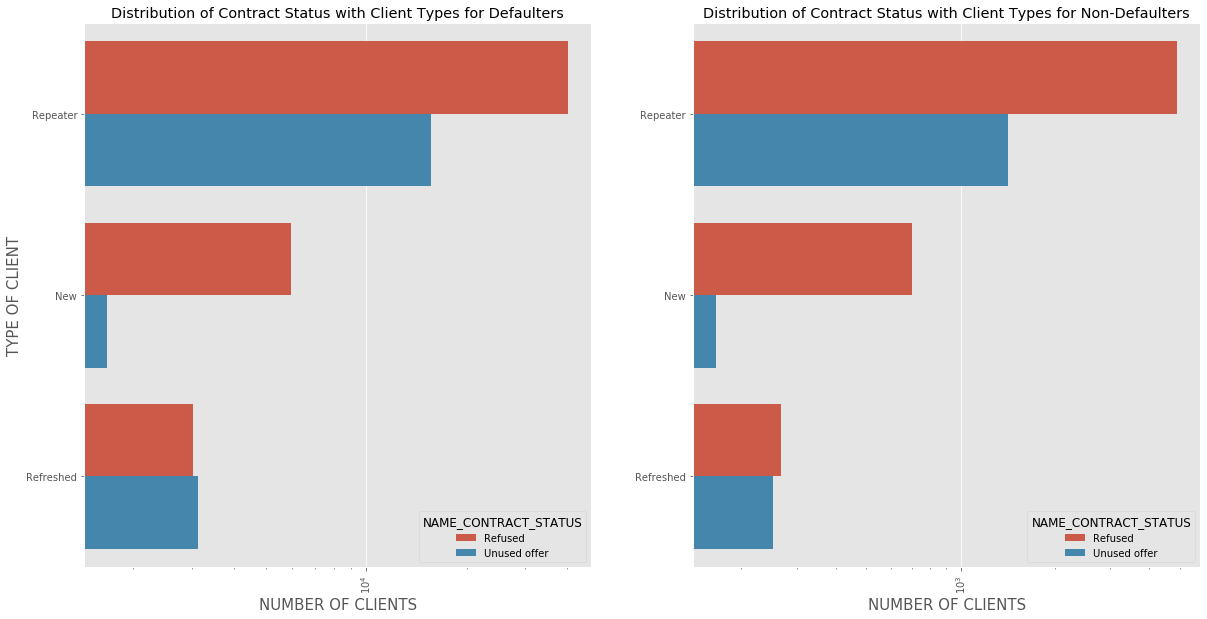

In [226]:
# Distribution of Contract status with client types for Defaulters and Non-Defaulters
# -----------------------------------------------------------------------------------

plt.style.use('ggplot')
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(y = df2_merged_target_0['NAME_CLIENT_TYPE'], 
              hue = df2_merged_target_0['NAME_CONTRACT_STATUS'],
              order = df2_merged_target_0['NAME_CLIENT_TYPE'].value_counts().index,
              orient = 'v') 
plt.title('Distribution of Contract Status with Client Types for Defaulters')
plt.ylabel('TYPE OF CLIENT', fontsize = 15)
plt.xlabel('NUMBER OF CLIENTS', fontsize = 15)
plt.xticks(rotation=90)
plt.xscale('log')

plt.subplot(1,2,2)
sns.countplot(y = df2_merged_target_1['NAME_CLIENT_TYPE'], 
              hue = df2_merged_target_1['NAME_CONTRACT_STATUS'],
              hue_order=['Refused','Unused offer'],
              order = df2_merged_target_1['NAME_CLIENT_TYPE'].value_counts().index,
              orient = 'v') 
plt.title('Distribution of Contract Status with Client Types for Non-Defaulters')
plt.xlabel('NUMBER OF CLIENTS', fontsize = 15)
plt.xticks(rotation=90)
plt.xscale('log')
plt.ylabel(" ")

plt.show()

In [227]:
# Observations and Inferences
# ---------------------------
#
# - We see that the clients who in the past are repeaters are more susceptible to Default on their loans. 
#   Majority of them have contract status as Refused.
# 
# - We also see that Number of Defaulter clients in the category - 'New' have contract type - 'Refused' are 
#   far more than clients in the same category and having contract type - 'Unused Offer'
#
#
# - We also see a near similar trend follows for non-defaulters as well.
#

In [228]:
# --------------------------------------------------------------------------------------------------------------------

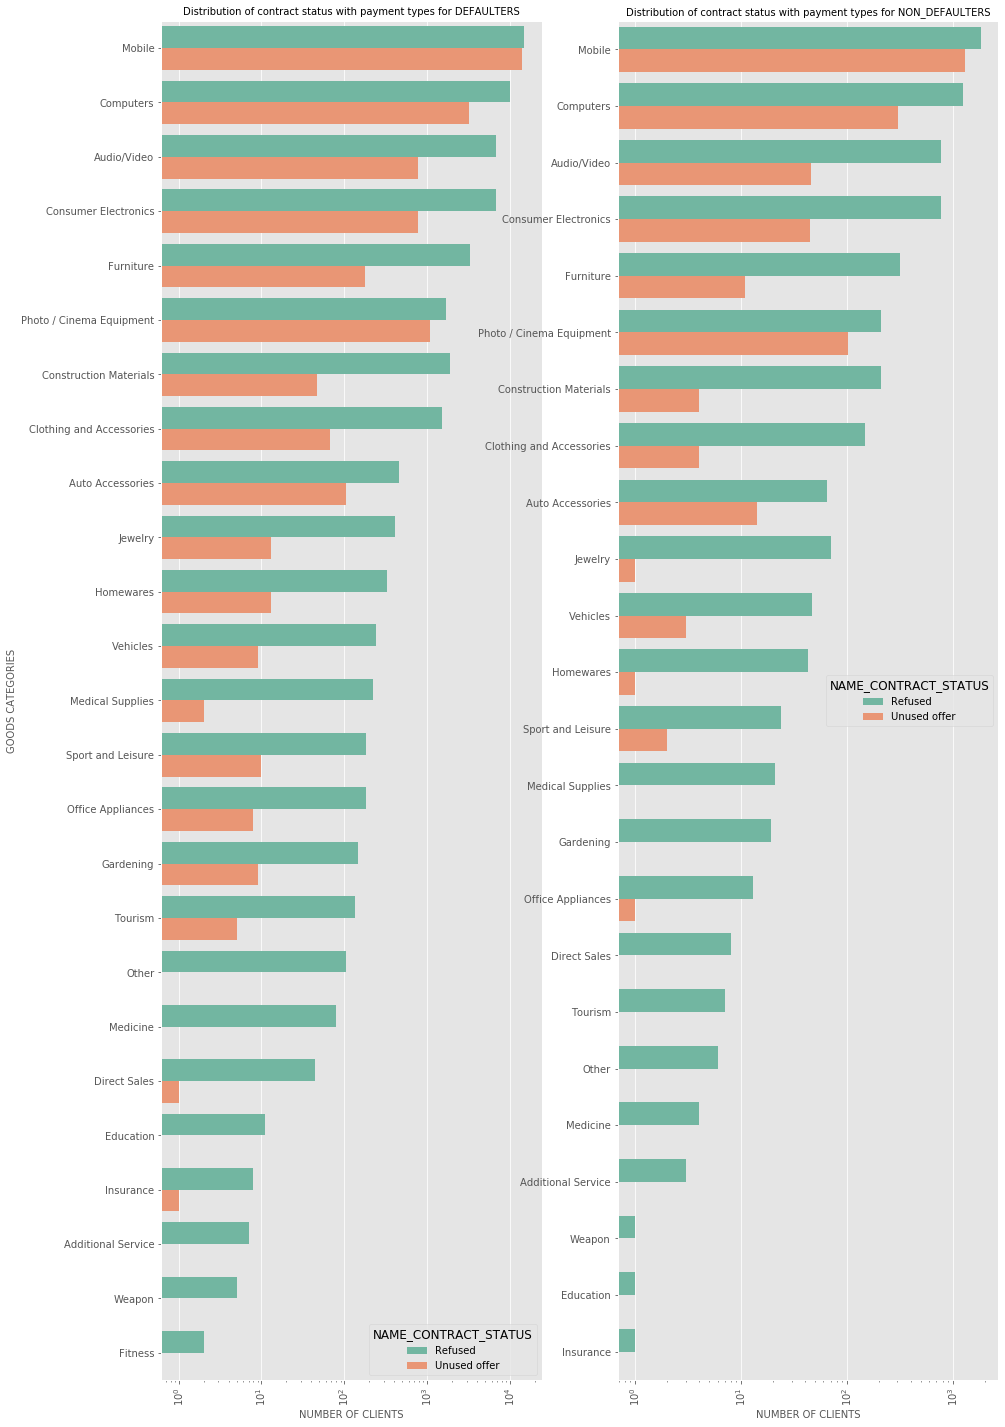

In [230]:
# For Defaulters, the Distribution of Contract status with Goods Categories is
# ----------------------------------------------------------------------------

plt.style.use('ggplot')
plt.figure(figsize = (15,25))

plt.subplot(1,2,1)
sns.countplot(y = df2_merged_target_0['NAME_GOODS_CATEGORY'], 
              order=df2_merged_target_0['NAME_GOODS_CATEGORY'].value_counts().index,
              hue = df2_merged_target_0['NAME_CONTRACT_STATUS'],
              palette='Set2') 
plt.title('Distribution of contract status with payment types for DEFAULTERS',fontsize = 10)
plt.ylabel('GOODS CATEGORIES', fontsize=10)
plt.xlabel('NUMBER OF CLIENTS', fontsize=10)
plt.xticks(rotation=90)
plt.xscale('log')

plt.subplot(1,2,2)
sns.countplot(y = df2_merged_target_1['NAME_GOODS_CATEGORY'], 
              order=df2_merged_target_1['NAME_GOODS_CATEGORY'].value_counts().index,
              hue = df2_merged_target_1['NAME_CONTRACT_STATUS'],
              hue_order=['Refused','Unused offer'],
              palette='Set2') 
plt.title('Distribution of contract status with payment types for NON_DEFAULTERS',fontsize = 10)
plt.ylabel('', fontsize=10)
plt.xlabel('NUMBER OF CLIENTS', fontsize=10)
plt.xticks(rotation=90)
plt.xscale('log')

plt.show()

In [231]:
# Observations and Inferences
# ---------------------------
# - We can observe that most number of defaulters clients are taking loans for Goods categories - 'Mobile', followed by 
#   'Computers' and 'Audio Video Equipment'.
# 
# - We see that most of the Defaulters as well as the Non-Defaulters have majority of their contract status as - 'Refused'.
# 
# - We also find that clients associated with 'Fitness' as their Goods Cateogry 
#   are very less susceptible to Default on their loans

In [233]:
# -------------------------------------------------------------------------------------------------------------------------

<br><br><br>
## Conclusion

There are some variables which are greatly impacting the chances of a client being a Loan Defaulter.<br>
They include - 

- **Client's Total Income**
- **Credit Amount: Total Credit Amount taken by the Client as Loan**
- **Income Type of Client**
- **Family Status of the Client**
- **Education Level of the Client**
- **Type of client: (whether a client is a Repeater or a New client or a Refreshed client)**
- **Goods_Categories: Goods for which the loan is taken.**

<br><br><br>
## Precautions that can be taken by the Bank to avoid Defaulters

- **Bank should check the profile of a client thoroughly, who have income in the brackett of 100 thousand dollars and 250 thousand dollars, before granting them loan.**
<br><br>
- **Bank should also check the profile of a client thoroughly, who are taking a loan either in the brackett of 200 to 300 thousand dollars or in the range 900 thousand dollars and above.**
<br><br>
- **Working class clients should be thoroughly processed, since they are the majority loan seekers and have a high probability to default.**
<br><br>
- **Well educated clients (Education level of Higher Education) should be granted more loans as compared to the less educated clients (Education level of Secondary/Secondary Special Education).**
<br><br>
- **Clients seeking loan for buying goods like Mobile Phones, Computers and Audio/Video equipments should be processed thoroughly before being granted the loan.**
<br><br>
- **Clients who are repeating loan seeker pose a high threat for Loan Default, so they should also be checked before being granted loan.**

----------------------------------------------